In [1]:
# Mapping from folder names to main misogyny categories

PROBLEM_TO_MAIN = {
# Objectification
"objectification": "Objectification",
"sexual_entitlement": "Objectification",
"sexual_innuendo": "Objectification",
"sexualization": "Objectification",
"unrealistic_beauty_standards": "Objectification",
"age_related_sexualization": "Objectification",
# Stereotyping
"stereotyping": "Stereotyping",
"false_equivalence": "Stereotyping",
"deflection": "Stereotyping",
"misunderstanding_feminism": "Stereotyping",
"mistrust_in_women": "Stereotyping",
"biased_judgement": "Stereotyping",
"false_accusations": "Stereotyping",
"scapegoating": "Stereotyping",
"divisiveness": "Stereotyping",
"misrepresentation": "Stereotyping",
"reductionism": "Stereotyping",
"commitment_phobia": "Stereotyping",

# Violence
"violence": "Violence",
"sexual_harassment": "Violence",
"promoting_rape_culture": "Violence",
"trivializing_consent": "Violence",
"victim_blaming": "Violence",
"endorsing_marital_rape": "Violence",
"promoting_self_harm": "Violence",
"professional_misconduct": "Violence",
# Shaming
"fat_shaming": "Shaming",
"derogatory_labeling": "Shaming",
"ridicule": "Shaming",

# Trivializing serious issues
"trivializing_serious_issues": "Trivializing serious issues",
"trivializing_women_s_issues": "Trivializing serious issues",
"trivializing_sexual_assault": "Trivializing serious issues",
"minimizing_feminist_efforts": "Trivializing serious issues",
"trivializing_women_s_sexual_satisfaction": "Trivializing serious issues",
"trivializing_mental_health_issues": "Trivializing serious issues",
"trivializing_oppression": "Trivializing serious issues",
"trivializing_infidelity": "Trivializing serious issues",
"trivializing_prostitution": "Trivializing serious issues",
"trivializing_eating_disorders": "Trivializing serious issues",
"trivializing_addiction": "Trivializing serious issues",
"trivializing_the_need_for_representation": "Trivializing serious issues",
# Patriarchal attitudes
"patriarchal_attitudes": "Patriarchal attitudes",
"patriarchal_control": "Patriarchal attitudes",
"possessiveness": "Patriarchal attitudes",
"ownership": "Patriarchal attitudes",
"gatekeeping": "Patriarchal attitudes",
"coercion": "Patriarchal attitudes",
"forced_marriage": "Patriarchal attitudes",
"policing_women_s_bodies": "Patriarchal attitudes",
"gender_essentialism": "Patriarchal attitudes",
"double_standards": "Patriarchal attitudes",
"enforced_gender_norms": "Patriarchal attitudes",
"conditional_respect": "Patriarchal attitudes",
"undermining_women_s_capabilities": "Patriarchal attitudes",
"demeaning_aspirations": "Patriarchal attitudes",
"intellectual_degradation": "Patriarchal attitudes",
"incest": "Patriarchal attitudes",
"wage_disparity": "Patriarchal attitudes",
"promoting_infidelity": "Patriarchal attitudes",
"dismissing_women_s_rights": "Patriarchal attitudes",
"undermining_women_s_rights_movements": "Patriarchal attitudes",
"male_validation": "Patriarchal attitudes",
"toxic_masculinity": "Patriarchal attitudes",
"women_subjugation": "Patriarchal attitudes",

# Disrespect towards women
"disrespect_towards_women": "Disrespect towards women",
"cultural_insensitivity": "Disrespect towards women",
"stigmatization": "Disrespect towards women",
"single_motherhood_stigmatization": "Disrespect towards women",
"menstruation_stigma": "Disrespect towards women",
"dismissiveness": "Disrespect towards women",
"invalidating_women_s_experiences": "Disrespect towards women",
"lack_of_accountability_by_men": "Disrespect towards women",
"disrespecting_sex_workers": "Disrespect towards women",

# Dehumanization
"dehumanization_of_women": "Dehumanization of women",
"demonization": "Dehumanization of women",
"disposability": "Dehumanization of women",
"fearmongering": "Dehumanization of women",
"women_valuation": "Dehumanization of women",

# Exploitation
"exploitation_of_women_by_men": "Exploitation of Women by Men",
"transactional_relationships": "Exploitation of Women by Men",
"pedophilia_exploitation": "Exploitation of Women by Men",

# Discrimination
"discrimination": "Discrimination of women",
"ableism": "Discrimination of women",
"ageism": "Discrimination of women",
"appearance_based_discrimination": "Discrimination of women",
"exclusion": "Discrimination of women",
"reverse_sexism": "Discrimination of women",
"workplace_discrimination": "Discrimination of women",
"racism": "Discrimination of women",
"intersectional_prejudice": "Discrimination of women",
"transphobia": "Discrimination of women",
"classism": "Discrimination of women",
"neo_sexism": "Discrimination of women",
"homophobia": "Discrimination of women",

# Pseudoscience
"sexist_pseudoscience": "Pseudoscience",
"conspiracy_thinking": "Pseudoscience"

}


In [3]:
PROBLEM_TO_MAIN.keys()

dict_keys(['objectification', 'sexual_entitlement', 'sexual_innuendo', 'sexualization', 'unrealistic_beauty_standards', 'age_related_sexualization', 'stereotyping', 'false_equivalence', 'deflection', 'misunderstanding_feminism', 'mistrust_in_women', 'biased_judgement', 'false_accusations', 'scapegoating', 'divisiveness', 'misrepresentation', 'reductionism', 'commitment_phobia', 'violence', 'sexual_harassment', 'promoting_rape_culture', 'trivializing_consent', 'victim_blaming', 'endorsing_marital_rape', 'promoting_self_harm', 'professional_misconduct', 'fat_shaming', 'derogatory_labeling', 'ridicule', 'trivializing_serious_issues', 'trivializing_women_s_issues', 'trivializing_sexual_assault', 'minimizing_feminist_efforts', 'trivializing_women_s_sexual_satisfaction', 'trivializing_mental_health_issues', 'trivializing_oppression', 'trivializing_infidelity', 'trivializing_prostitution', 'trivializing_eating_disorders', 'trivializing_addiction', 'trivializing_the_need_for_representation', '

In [2]:
import os
import json
from collections import defaultdict, Counter
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns

# ---- Config ----
FINAL_FRAMES_DIR = "final_frames"

def get_main_category(problem_name):
    return PROBLEM_TO_MAIN.get(problem_name, "Unknown")

def extract_value_key(level):
    return {
        1: ("level_1_values", "level_1_value"),
        2: ("level_2_values", "level_2_value"),
        3: ("level_3_values", "level_3_value")
    }[level]


In [3]:
def count_frames_in_problem(problem_name, base_dir="final_frames"):
    """
    Counts how many frames (lines) exist in the `values.jsonl` of a specific subproblem folder.
    """
    values_path = os.path.join(base_dir, problem_name, "values.jsonl")
    if not os.path.exists(values_path):
        return 0
    with open(values_path, "r") as f:
        return sum(1 for _ in f)

def count_frames_in_category(main_category, base_dir="final_frames"):
    """
    Counts how many frames exist in total across all subproblems that belong to a main category.
    """
    count = 0
    for problem_folder in os.listdir(base_dir):
        if get_main_category(problem_folder) == main_category:
            count += count_frames_in_problem(problem_folder, base_dir)
    return count

In [4]:
# ---- Function 1: Distribution Across Main Categories ----
def analyze_values_across_main_categories(level=2, top_n=10, show_plot=True, normalize=False):
    value_container, value_key = extract_value_key(level)
    category_counts = defaultdict(Counter)

    for problem_folder in os.listdir(FINAL_FRAMES_DIR):
        main_cat = get_main_category(problem_folder)
        file_path = os.path.join(FINAL_FRAMES_DIR, problem_folder, "values.jsonl")
        if not os.path.isfile(file_path): continue

        with open(file_path) as f:
            for line in f:
                data = json.loads(line)
                values = data.get("response", {}).get("values", {}).get(value_container, [])
                for v in values:
                    value_name = v.get(value_key)
                    if value_name:
                        category_counts[main_cat][value_name] += 1

    df = pd.DataFrame(category_counts).fillna(0).astype(int)
    if normalize:
        frame_counts = {
        cat: count_frames_in_category(cat)  # Implement this based on values.jsonl count
        for cat in df.columns
    }
        for col in df.columns:
            df[col] = df[col] / frame_counts[col]

    df = df.loc[df.sum(axis=1).sort_values(ascending=False).head(top_n).index]

    if show_plot:
        plt.figure(figsize=(14, 6))
        if normalize:
            sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
        else:
            sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
        plt.title(f"Top {top_n} Level-{level} Values Across Main Misogyny Categories")
        plt.xlabel("Main Category")
        plt.ylabel("Value")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    return df

# ---- Function 2: Distribution Within One Main Category ----
def analyze_values_within_main_category(main_category_name, level=2, top_n=10, show_plot=True, normalize=False):
    value_container, value_key = extract_value_key(level)
    sub_counts = defaultdict(Counter)

    for problem_folder in os.listdir(FINAL_FRAMES_DIR):
        if get_main_category(problem_folder) != main_category_name:
            continue

        sub_cat = problem_folder  # can optionally extract sub-ID here
        file_path = os.path.join(FINAL_FRAMES_DIR, problem_folder, "values.jsonl")
        if not os.path.isfile(file_path): continue

        with open(file_path) as f:
            for line in f:
                data = json.loads(line)
                values = data.get("response", {}).get("values", {}).get(value_container, [])
                for v in values:
                    value_name = v.get(value_key)
                    if value_name:
                        sub_counts[sub_cat][value_name] += 1

    df = pd.DataFrame(sub_counts).fillna(0).astype(int)

    if normalize:
        frame_counts = {
        cat: count_frames_in_problem(cat)  # Implement this based on values.jsonl count
        for cat in df.columns
    }
        for col in df.columns:
            df[col] = df[col] / frame_counts[col]
    
    df = df.loc[df.sum(axis=1).sort_values(ascending=False).head(top_n).index]

    if show_plot:
        plt.figure(figsize=(14, 6))
        if normalize:
            sns.heatmap(df, annot=True, fmt=".2f", cmap="Oranges", linewidths=0.5)
        else:
            sns.heatmap(df, annot=True, fmt="d", cmap="Oranges", linewidths=0.5)
        plt.title(f"Top {top_n} Level-{level} Values in: {main_category_name}")
        plt.xlabel("Subcategory", fontsize=14)
        plt.ylabel("Value", fontsize=14)
        plt.xticks(rotation=45, ha="right", fontsize=14)
        plt.tight_layout()
        plt.show()

    return df


In [5]:
def plot_top_values_for_main_category_bar(main_category, level=2, top_n=10, base_dir="final_frames"):
    """
    Plots a bar chart of the top-N values (by normalized frequency) within a single main category.
    Normalization = value count / total unique frames in that main category.
    Bar labels show percentage.
    """
    value_container, value_key = extract_value_key(level)
    value_counter = Counter()
    seen_ids = set()

    # Step 1: Aggregate value counts and unique frame IDs for that main category
    for problem_folder in os.listdir(base_dir):
        if get_main_category(problem_folder) != main_category:
            continue
        values_path = os.path.join(base_dir, problem_folder, "values.jsonl")
        if not os.path.isfile(values_path):
            continue

        with open(values_path) as f:
            for line in f:
                try:
                    data = json.loads(line)
                    frame_id = data.get("id")
                    if not frame_id or frame_id in seen_ids:
                        continue
                    seen_ids.add(frame_id)

                    values = data.get("response", {}).get("values", {}).get(value_container, [])
                    for v in values:
                        val = v.get(value_key)
                        if val:
                            value_counter[val] += 1
                except json.JSONDecodeError:
                    continue

    total_frames = count_frames_in_category(main_category)
    if total_frames == 0:
        print(f"No frames found in category: {main_category}")
        return None

    top_vals = value_counter.most_common(top_n)
    df = pd.DataFrame([
        {
            "value": val,
            "normalized_percent": (count / total_frames) * 100
        }
        for val, count in top_vals
    ])

    # Step 2: Plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df, x="value", y="normalized_percent", palette="Set2")

    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f"{height:.1f}%", (bar.get_x() + bar.get_width() / 2, height),
                    ha="center", va="bottom", fontsize=9)

    plt.title(f"Top {top_n} Values in {main_category} (Level {level})")
    plt.ylabel("Percent of Frames",fontsize=14)
    plt.xlabel("Value", fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=14)
    plt.tight_layout()
    plt.show()

    return df


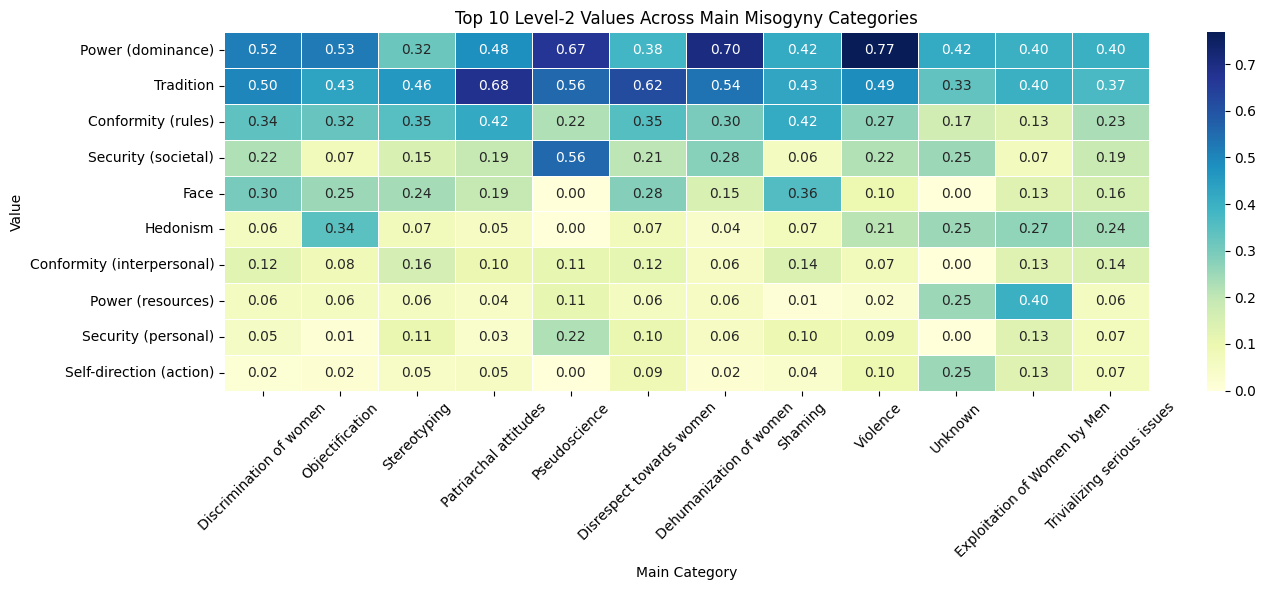

Discrimination of women  Objectification  \
Power (dominance)                          0.515385         0.525114   
Tradition                                  0.500000         0.429224   
Conformity (rules)                         0.338462         0.324201   
Security (societal)                        0.223077         0.073059   
Face                                       0.300000         0.251142   
Hedonism                                   0.061538         0.342466   
Conformity (interpersonal)                 0.123077         0.082192   
Power (resources)                          0.061538         0.059361   
Security (personal)                        0.053846         0.013699   
Self-direction (action)                    0.015385         0.018265   

                            Stereotyping  Patriarchal attitudes  \
Power (dominance)               0.320000               0.482587   
Tradition                       0.461818               0.681592   
Conformity (rules)              0.349091               0.417910   
Security (societal)             0.149091               0.194030   
Face                            0.240000               0.194030   
Hedonism                        0.072727               0.054726   
Conformity (interpersonal)      0.160000               0.099502   
Power (resources)               0.058182               0.044776   
Security (personal)             0.105455               0.034826   
Self-direction (action)         0.047273               0.054726   

                            Pseudoscience  Disrespect towards women  \
Power (dominance)                0.666667                  0.382353   
Tradition                        0.555556                  0.617647   
Conformity (rules)               0.222222                  0.352941   
Security (societal)              0.555556                  0.205882   
Face                             0.000000                  0.279412   
Hedonism                         0.000000                  0.073529   
Conformity (interpersonal)       0.111111                  0.117647   
Power (resources)                0.111111                  0.058824   
Security (personal)              0.222222                  0.102941   
Self-direction (action)          0.000000                  0.088235   

                            Dehumanization of women   Shaming  Violence  \
Power (dominance)                          0.703704  0.416667  0.768293   
Tradition                                  0.537037  0.428571  0.487805   
Conformity (rules)                         0.296296  0.416667  0.268293   
Security (societal)                        0.277778  0.059524  0.219512   
Face                                       0.148148  0.357143  0.097561   
Hedonism                                   0.037037  0.071429  0.207317   
Conformity (interpersonal)                 0.055556  0.142857  0.073171   
Power (resources)                          0.055556  0.011905  0.024390   
Security (personal)                        0.055556  0.095238  0.085366   
Self-direction (action)                    0.018519  0.035714  0.097561   

                             Unknown  Exploitation of Women by Men  \
Power (dominance)           0.416667                      0.400000   
Tradition                   0.333333                      0.400000   
Conformity (rules)          0.166667                      0.133333   
Security (societal)         0.250000                      0.066667   
Face                        0.000000                      0.133333   
Hedonism                    0.250000                      0.266667   
Conformity (interpersonal)  0.000000                      0.133333   
Power (resources)           0.250000                      0.400000   
Security (personal)         0.000000                      0.133333   
Self-direction (action)     0.250000                      0.133333   

                            Trivializing serious issues  
Power (dominance)                              0.400000  
Tr

In [23]:
analyze_values_across_main_categories(normalize=True)

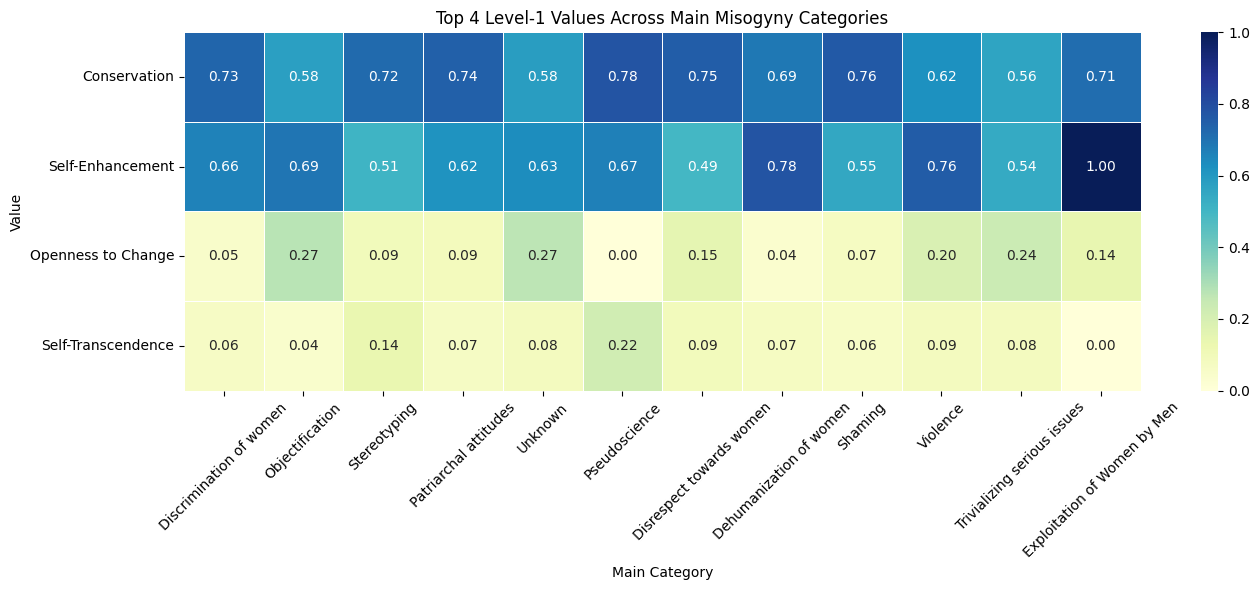

Discrimination of women  Objectification  Stereotyping  \
Conservation                       0.733871         0.575342      0.719697   
Self-Enhancement                   0.661290         0.694064      0.507576   
Openness to Change                 0.048387         0.273973      0.094697   
Self-Transcendence                 0.064516         0.041096      0.136364   

                    Patriarchal attitudes   Unknown  Pseudoscience  \
Conservation                     0.744792  0.583333       0.777778   
Self-Enhancement                 0.619792  0.633333       0.666667   
Openness to Change               0.088542  0.266667       0.000000   
Self-Transcendence               0.067708  0.083333       0.222222   

                    Disrespect towards women  Dehumanization of women  \
Conservation                        0.753846                 0.685185   
Self-Enhancement                    0.492308                 0.777778   
Openness to Change                  0.153846                 0.037037   
Self-Transcendence                  0.092308                 0.074074   

                     Shaming  Violence  Trivializing serious issues  \
Conservation        0.761905  0.621951                     0.559322   
Self-Enhancement    0.547619  0.756098                     0.542373   
Openness to Change  0.071429  0.195122                     0.237288   
Self-Transcendence  0.059524  0.085366                     0.084746   

                    Exploitation of Women by Men  
Conservation                            0.714286  
Self-Enhancement                        1.000000  
Openness to Change                      0.142857  
Self-Transcendence                      0.000000

In [6]:
analyze_values_across_main_categories(level=1,top_n=4,normalize=True)

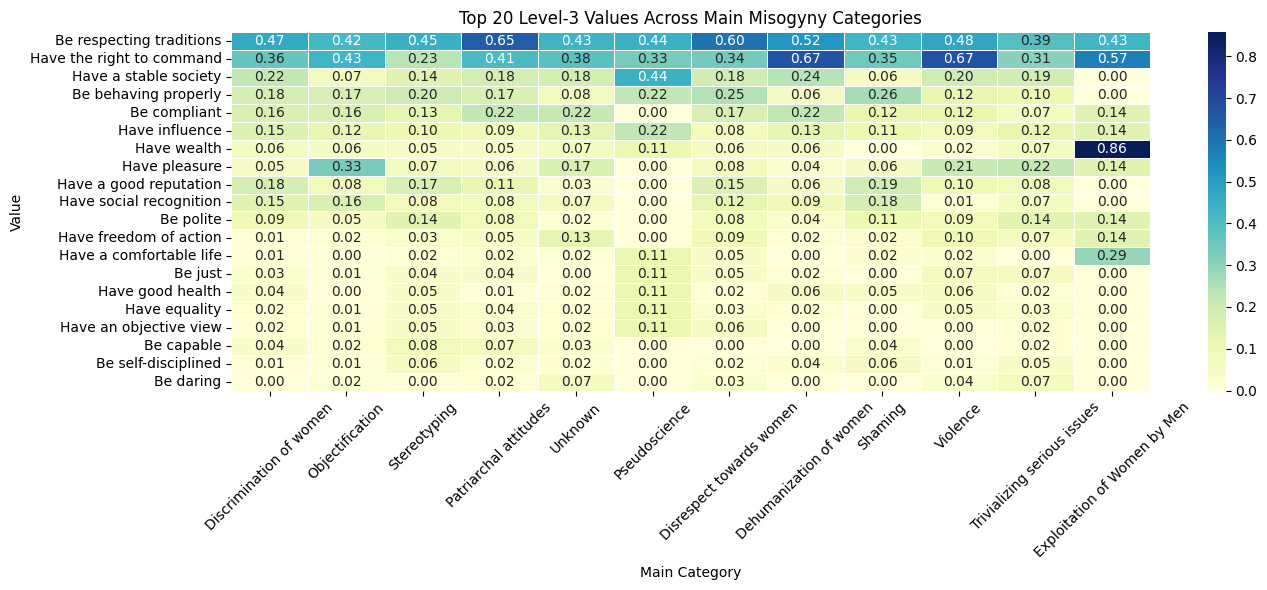

Discrimination of women  Objectification  \
Be respecting traditions                  0.467742         0.420091   
Have the right to command                 0.362903         0.429224   
Have a stable society                     0.217742         0.073059   
Be behaving properly                      0.177419         0.168950   
Be compliant                              0.161290         0.164384   
Have influence                            0.153226         0.123288   
Have wealth                               0.064516         0.059361   
Have pleasure                             0.048387         0.333333   
Have a good reputation                    0.177419         0.082192   
Have social recognition                   0.145161         0.164384   
Be polite                                 0.088710         0.054795   
Have freedom of action                    0.008065         0.018265   
Have a comfortable life                   0.008065         0.004566   
Be just                                   0.032258         0.009132   
Have good health                          0.040323         0.000000   
Have equality                             0.016129         0.009132   
Have an objective view                    0.016129         0.013699   
Be capable                                0.040323         0.018265   
Be self-disciplined                       0.008065         0.009132   
Be daring                                 0.000000         0.018265   

                           Stereotyping  Patriarchal attitudes   Unknown  \
Be respecting traditions       0.446970               0.645833  0.433333   
Have the right to command      0.234848               0.411458  0.383333   
Have a stable society          0.143939               0.182292  0.183333   
Be behaving properly           0.200758               0.166667  0.083333   
Be compliant                   0.132576               0.218750  0.216667   
Have influence                 0.102273               0.088542  0.133333   
Have wealth                    0.053030               0.046875  0.066667   
Have pleasure                  0.071970               0.057292  0.166667   
Have a good reputation         0.166667               0.114583  0.033333   
Have social recognition        0.083333               0.078125  0.066667   
Be polite                      0.143939               0.083333  0.016667   
Have freedom of action         0.034091               0.046875  0.133333   
Have a comfortable life        0.018939               0.020833  0.016667   
Be just                        0.041667               0.041667  0.000000   
Have good health               0.045455               0.005208  0.016667   
Have equality                  0.045455               0.036458  0.016667   
Have an objective view         0.045455               0.026042  0.016667   
Be capable                     0.083333               0.072917  0.033333   
Be self-disciplined            0.060606               0.020833  0.016667   
Be daring                      0.003788               0.015625  0.066667   

                           Pseudoscience  Disrespect towards women  \
Be respecting traditions        0.444444                  0.600000   
Have the right to command       0.333333                  0.338462   
Have a stable society           0.444444                  0.184615   
Be behaving properly            0.222222                  0.246154   
Be compliant                    0.000000                  0.169231   
Have influence                  0.222222                  0.076923   
Have wealth                     0.111111                  0.061538   
Have pleasure                   0.000000                  0.076923   
Have a good reputation          0.000000                  0.153846   
Have social recognition         0.000000                  0.123077   
Be polite                       0.000000                  0.076923   
Have freedom of action          0.000000                  0.092308   
Have a comfortable life     

In [7]:
analyze_values_across_main_categories(level=3,top_n=20,normalize=True)

In [ ]:
"Objectification"
"Stereotyping"
"Patriarchal attitudes"
"Disrespect towards women"
"Dehumanization of women"
"Shaming"
"Violence"
"Trivializing serious issues"
"Exploitation of Women by Men"
"Discrimination of women"
"Pseudoscience"

/tmp/ipykernel_62342/2275440866.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="value", y="normalized_percent", palette="Set2")


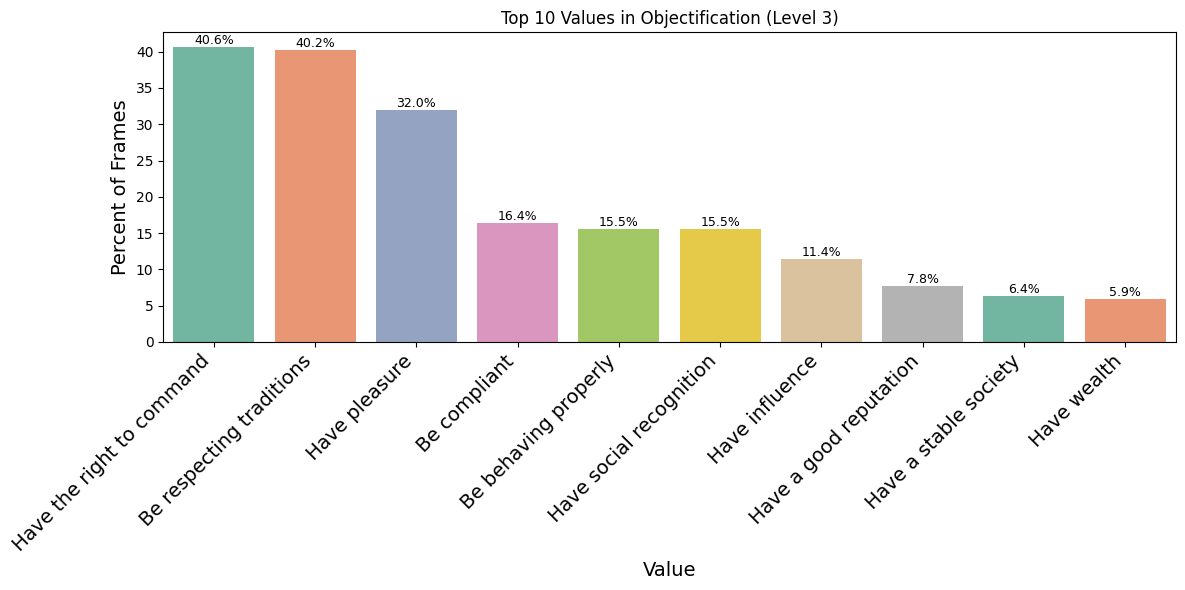

value  normalized_percent
0  Have the right to command           40.639269
1   Be respecting traditions           40.182648
2              Have pleasure           31.963470
3               Be compliant           16.438356
4       Be behaving properly           15.525114
5    Have social recognition           15.525114
6             Have influence           11.415525
7     Have a good reputation            7.762557
8      Have a stable society            6.392694
9                Have wealth            5.936073

In [103]:
plot_top_values_for_main_category_bar("Objectification", level=3)

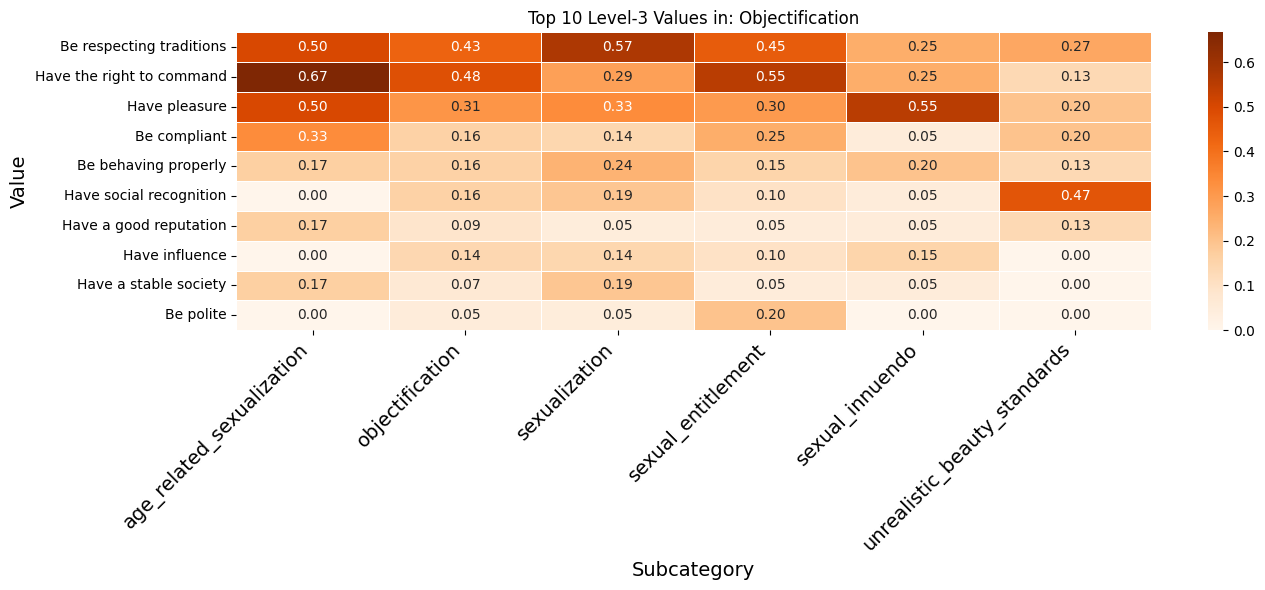

age_related_sexualization  objectification  \
Be respecting traditions                    0.500000         0.430657   
Have the right to command                   0.666667         0.481752   
Have pleasure                               0.500000         0.313869   
Be compliant                                0.333333         0.160584   
Be behaving properly                        0.166667         0.160584   
Have social recognition                     0.000000         0.160584   
Have a good reputation                      0.166667         0.087591   
Have influence                              0.000000         0.138686   
Have a stable society                       0.166667         0.065693   
Be polite                                   0.000000         0.051095   

                           sexualization  sexual_entitlement  sexual_innuendo  \
Be respecting traditions        0.571429                0.45             0.25   
Have the right to command       0.285714                0.55             0.25   
Have pleasure                   0.333333                0.30             0.55   
Be compliant                    0.142857                0.25             0.05   
Be behaving properly            0.238095                0.15             0.20   
Have social recognition         0.190476                0.10             0.05   
Have a good reputation          0.047619                0.05             0.05   
Have influence                  0.142857                0.10             0.15   
Have a stable society           0.190476                0.05             0.05   
Be polite                       0.047619                0.20             0.00   

                           unrealistic_beauty_standards  
Be respecting traditions                       0.266667  
Have the right to command                      0.133333  
Have pleasure                                  0.200000  
Be compliant                                   0.200000  
Be behaving properly                           0.133333  
Have social recognition                        0.466667  
Have a good reputation                         0.133333  
Have influence                                 0.000000  
Have a stable society                          0.000000  
Be polite                                      0.000000

In [104]:
analyze_values_within_main_category("Objectification", normalize=True, level=3)

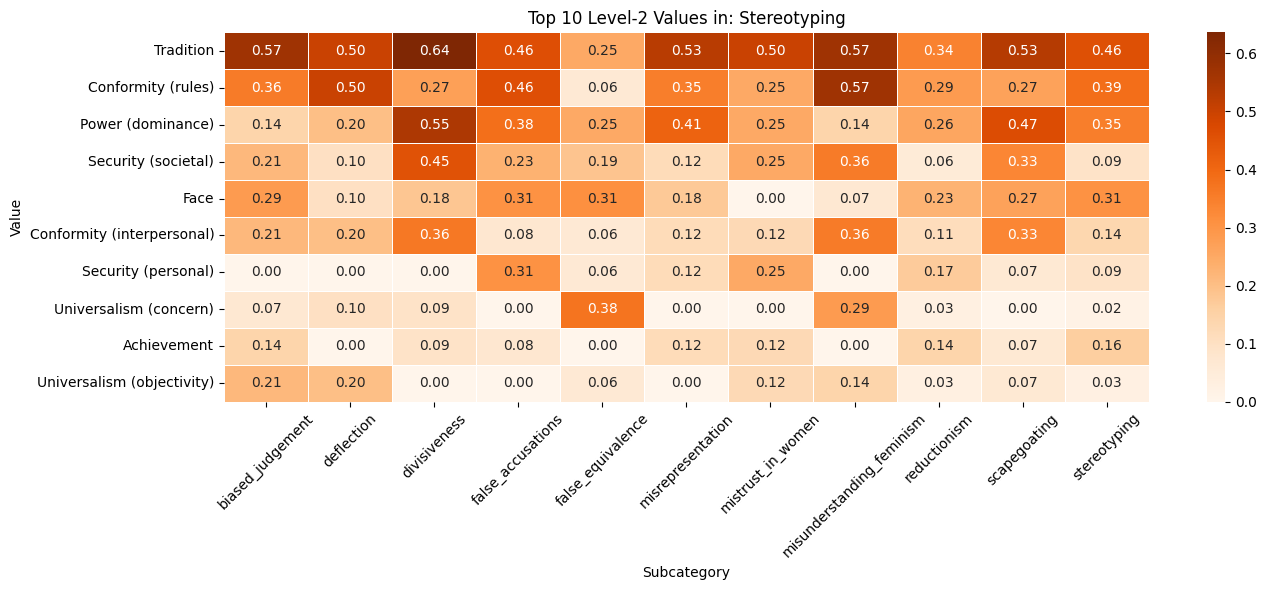

biased_judgement  deflection  divisiveness  \
Tradition                           0.571429         0.5      0.636364   
Conformity (rules)                  0.357143         0.5      0.272727   
Power (dominance)                   0.142857         0.2      0.545455   
Security (societal)                 0.214286         0.1      0.454545   
Face                                0.285714         0.1      0.181818   
Conformity (interpersonal)          0.214286         0.2      0.363636   
Security (personal)                 0.000000         0.0      0.000000   
Universalism (concern)              0.071429         0.1      0.090909   
Achievement                         0.142857         0.0      0.090909   
Universalism (objectivity)          0.214286         0.2      0.000000   

                            false_accusations  false_equivalence  \
Tradition                            0.461538             0.2500   
Conformity (rules)                   0.461538             0.0625   
Power (dominance)                    0.384615             0.2500   
Security (societal)                  0.230769             0.1875   
Face                                 0.307692             0.3125   
Conformity (interpersonal)           0.076923             0.0625   
Security (personal)                  0.307692             0.0625   
Universalism (concern)               0.000000             0.3750   
Achievement                          0.076923             0.0000   
Universalism (objectivity)           0.000000             0.0625   

                            misrepresentation  mistrust_in_women  \
Tradition                            0.529412              0.500   
Conformity (rules)                   0.352941              0.250   
Power (dominance)                    0.411765              0.250   
Security (societal)                  0.117647              0.250   
Face                                 0.176471              0.000   
Conformity (interpersonal)           0.117647              0.125   
Security (personal)                  0.117647              0.250   
Universalism (concern)               0.000000              0.000   
Achievement                          0.117647              0.125   
Universalism (objectivity)           0.000000              0.125   

                            misunderstanding_feminism  reductionism  \
Tradition                                    0.571429      0.342857   
Conformity (rules)                           0.571429      0.285714   
Power (dominance)                            0.142857      0.257143   
Security (societal)                          0.357143      0.057143   
Face                                         0.071429      0.228571   
Conformity (interpersonal)                   0.357143      0.114286   
Security (personal)                          0.000000      0.171429   
Universalism (concern)                       0.285714      0.028571   
Achievement                                  0.000000      0.142857   
Universalism (objectivity)                   0.142857      0.028571   

                            scapegoating  stereotyping  
Tradition                       0.533333      0.459459  
Conformity (rules)              0.266667      0.387387  
Power (dominance)               0.466667      0.351351  
Security (societal)             0.333333      0.090090  
Face                            0.266667      0.306306  
Conformity (interpersonal)      0.333333      0.135135  
Security (personal)             0.066667      0.090090  
Universalism (concern)          0.000000      0.018018  
Achievement                     0.066667      0.162162  
Universalism (objectivity)      0.066667      0.027027

In [9]:
analyze_values_within_main_category("Stereotyping",normalize=True)

Value co-occurence

In [13]:
# --- Get all value sets per frame ---
def get_all_value_sets(level, base_dir="final_frames"):
    value_sets = []  # list of sets
    for problem_folder in os.listdir(base_dir):
        path = os.path.join(base_dir, problem_folder, "values.jsonl")
        if not os.path.isfile(path): continue
        value_container, value_key = extract_value_key(level)

        with open(path) as f:
            for line in f:
                data = json.loads(line)
                value_items = data.get("response", {}).get("values", {}).get(value_container, [])
                val_set = {item.get(value_key) for item in value_items if item.get(value_key)}
                if val_set:
                    value_sets.append(val_set)
    return value_sets

# --- Get value sets grouped by main category ---
def get_value_sets_by_category(level, base_dir="final_frames"):
    value_container, value_key = extract_value_key(level)
    sets_by_cat = defaultdict(list)

    for problem_folder in os.listdir(base_dir):
        category = get_main_category(problem_folder)
        path = os.path.join(base_dir, problem_folder, "values.jsonl")
        if not os.path.isfile(path): continue

        with open(path) as f:
            for line in f:
                data = json.loads(line)
                value_items = data.get("response", {}).get("values", {}).get(value_container, [])
                val_set = {item.get(value_key) for item in value_items if item.get(value_key)}
                if val_set:
                    sets_by_cat[category].append(val_set)
    return sets_by_cat

# --- Build co-occurrence matrix ---
def compute_cooccurrence(value_sets, top_n=None):
    cooccur = Counter()
    value_freq = Counter()

    for val_set in value_sets:
        for val in val_set:
            value_freq[val] += 1
        for v1, v2 in combinations(sorted(val_set), 2):
            cooccur[(v1, v2)] += 1
            cooccur[(v2, v1)] += 1  # ensure symmetry

    # Restrict to top N values
    if top_n:
        top_values = {v for v, _ in value_freq.most_common(top_n)}
    else:
        top_values = set(value_freq.keys())

    # Build symmetric matrix
    values = sorted(top_values)
    df = pd.DataFrame(0, index=values, columns=values)
    for (v1, v2), count in cooccur.items():
        if v1 in top_values and v2 in top_values:
            df.loc[v1, v2] = count
    return df
def compute_normalized_cooccurrence(value_sets, top_n=None):
    # Count individual and pairwise co-occurrence
    cooccur = Counter()
    value_freq = Counter()

    for val_set in value_sets:
        for val in val_set:
            value_freq[val] += 1
        for v1, v2 in combinations(sorted(val_set), 2):
            cooccur[(v1, v2)] += 1
            cooccur[(v2, v1)] += 1  # for symmetry

    if top_n:
        top_values = {v for v, _ in value_freq.most_common(top_n)}
    else:
        top_values = set(value_freq)

    values = sorted(top_values)
    df = pd.DataFrame(0.0, index=values, columns=values)

    for v1 in values:
        for v2 in values:
            if v1 == v2:
                df.loc[v1, v2] = 1.0
            else:
                intersect = cooccur.get((v1, v2), 0)
                union = value_freq[v1] + value_freq[v2] - intersect
                df.loc[v1, v2] = intersect / union if union > 0 else 0.0

    return df
# --- Plot heatmap ---
def plot_cooccurrence_heatmap(df, title, normalize=False):
    plt.figure(figsize=(12, 10))
    if normalize:
        sns.heatmap(df, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
    else:
        sns.heatmap(df, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
   
    plt.title(title)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

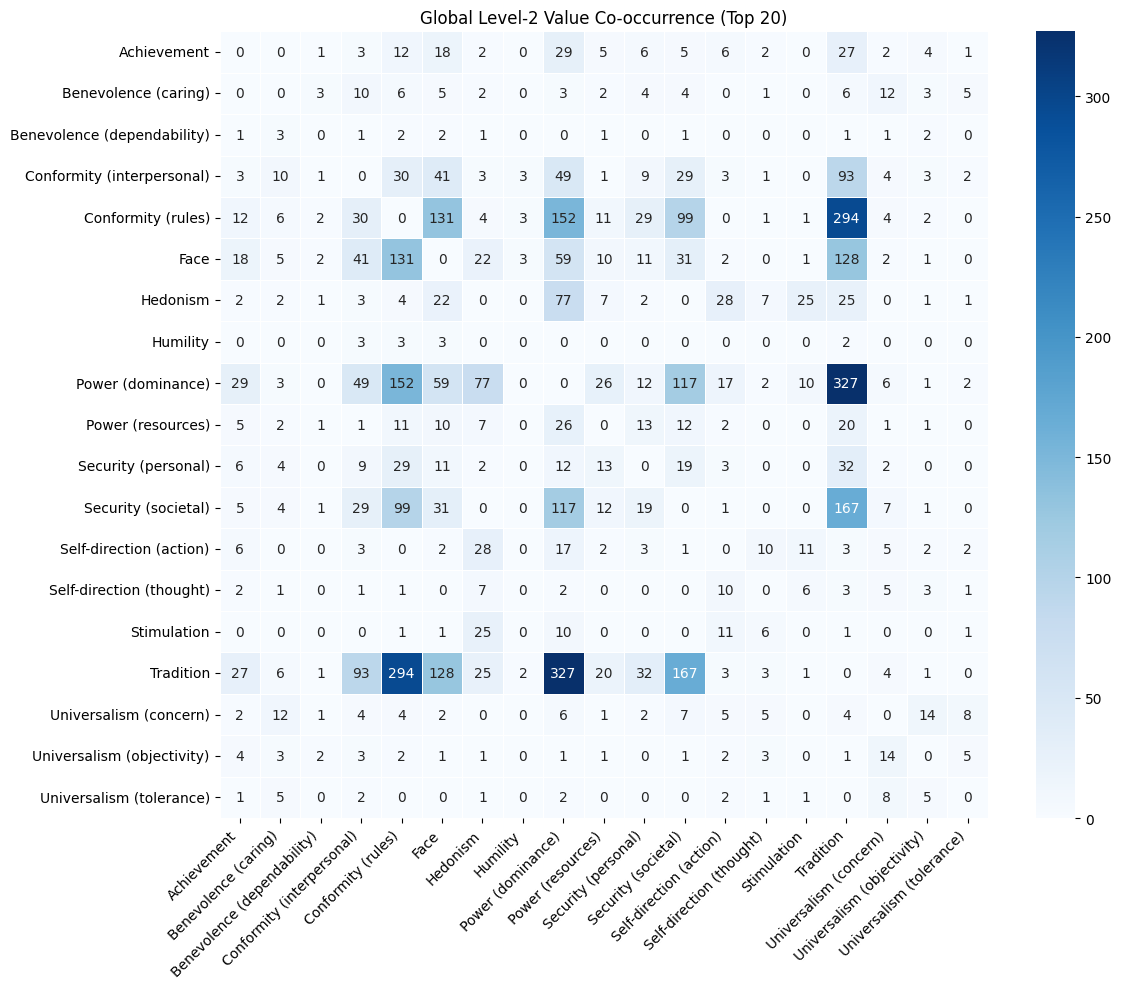

In [14]:
#Global value Co-occurrence
value_sets = get_all_value_sets(level=2)
df_global = compute_cooccurrence(value_sets, top_n=20)
plot_cooccurrence_heatmap(df_global, title="Global Level-2 Value Co-occurrence (Top 20)")


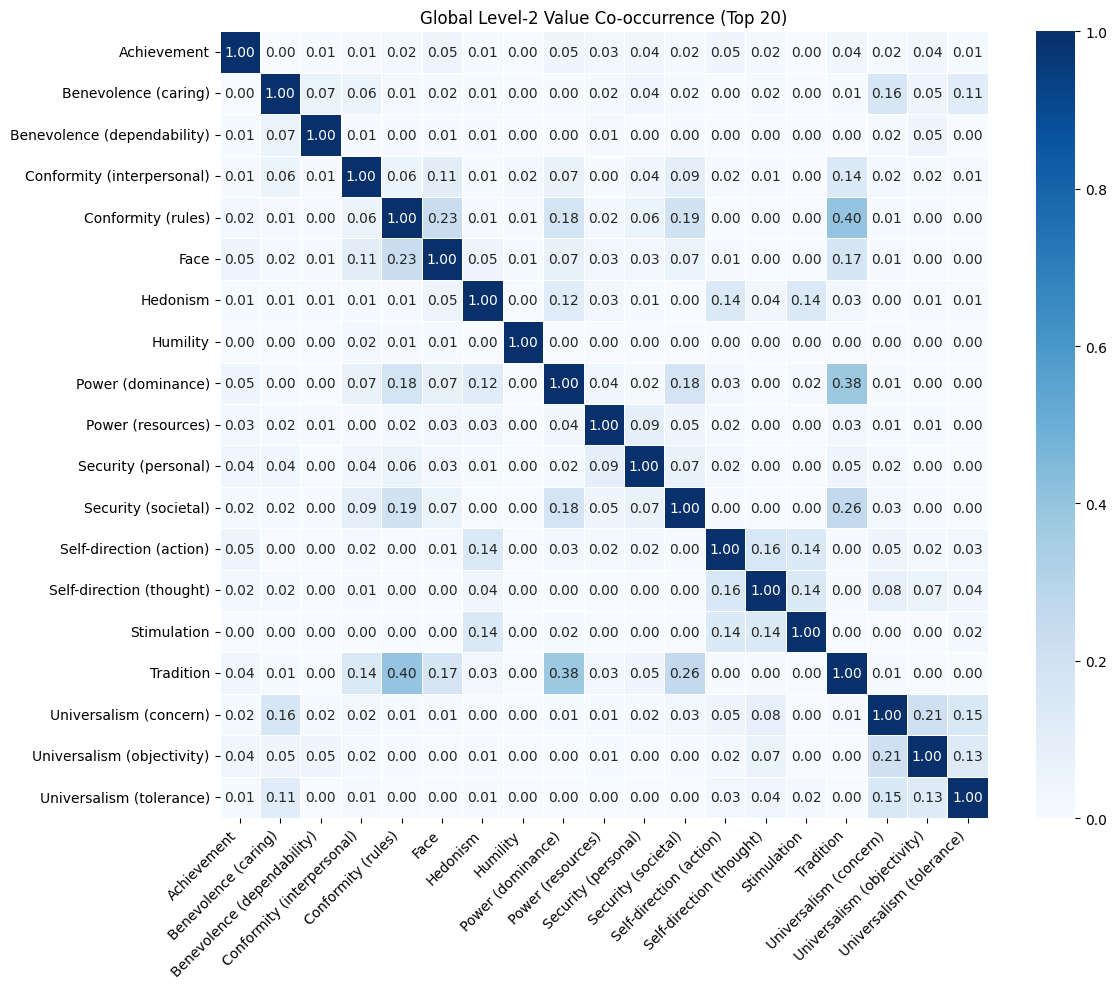

In [16]:
#Global value Co-occurrence
value_sets = get_all_value_sets(level=2)
df_norm = compute_normalized_cooccurrence(value_sets, top_n=None)
plot_cooccurrence_heatmap(df_norm, title="Global Level-2 Value Co-occurrence (Top 20)", normalize=True)


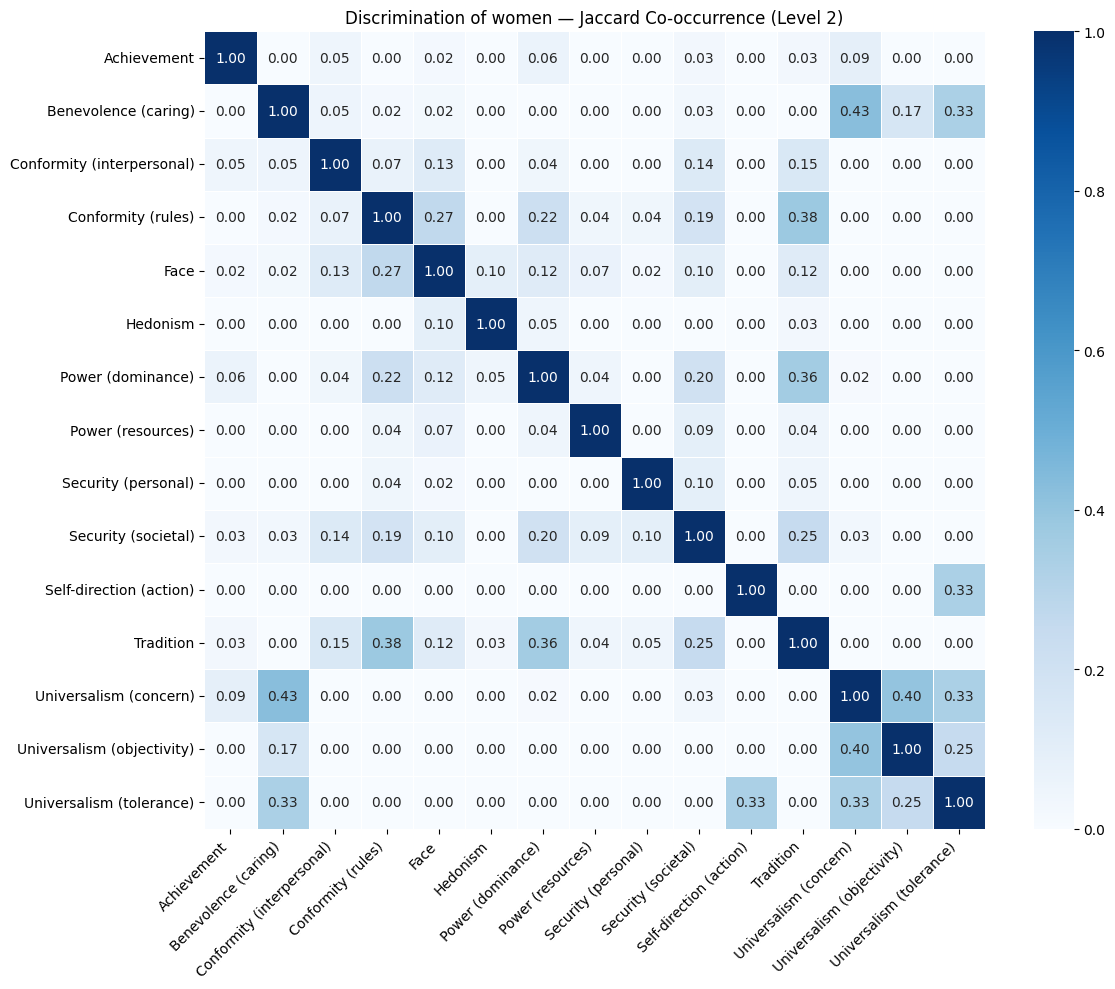

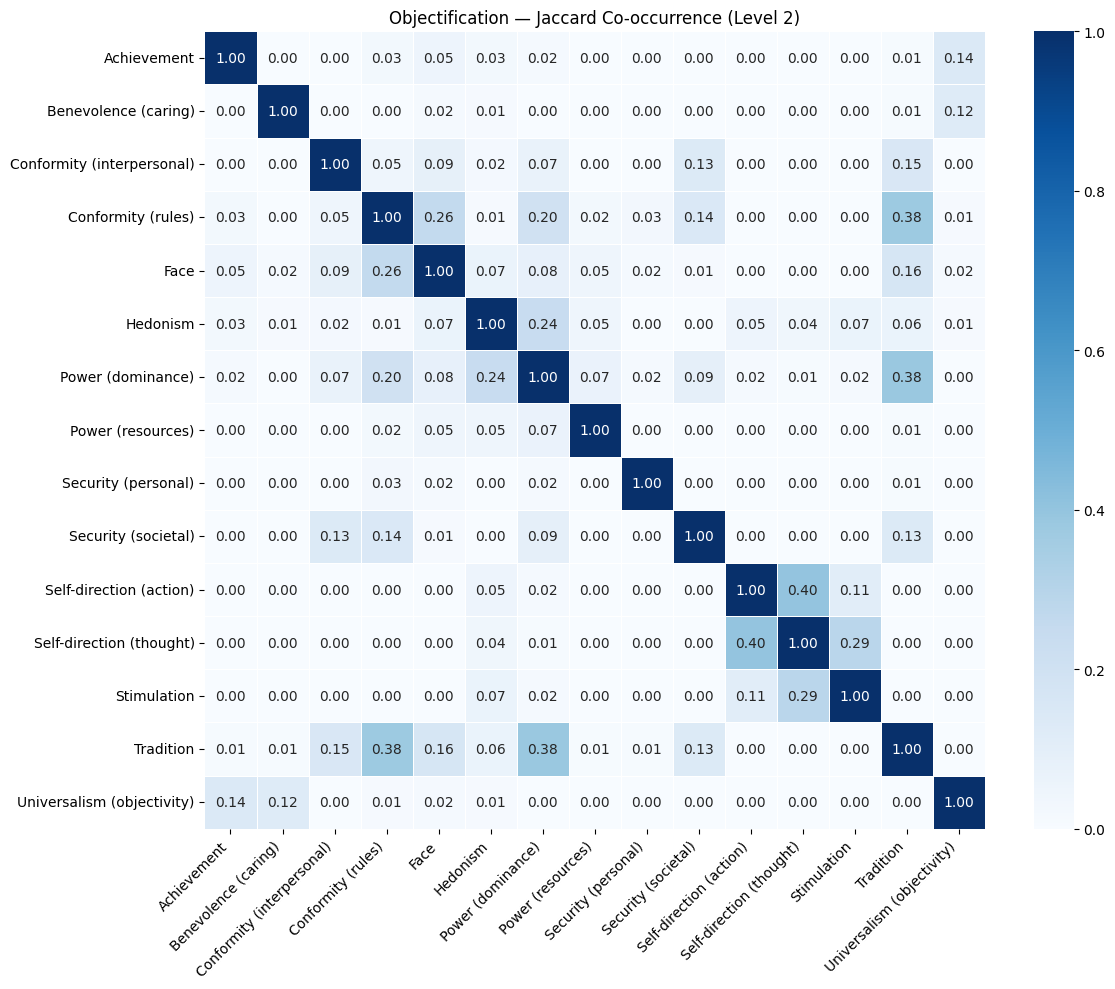

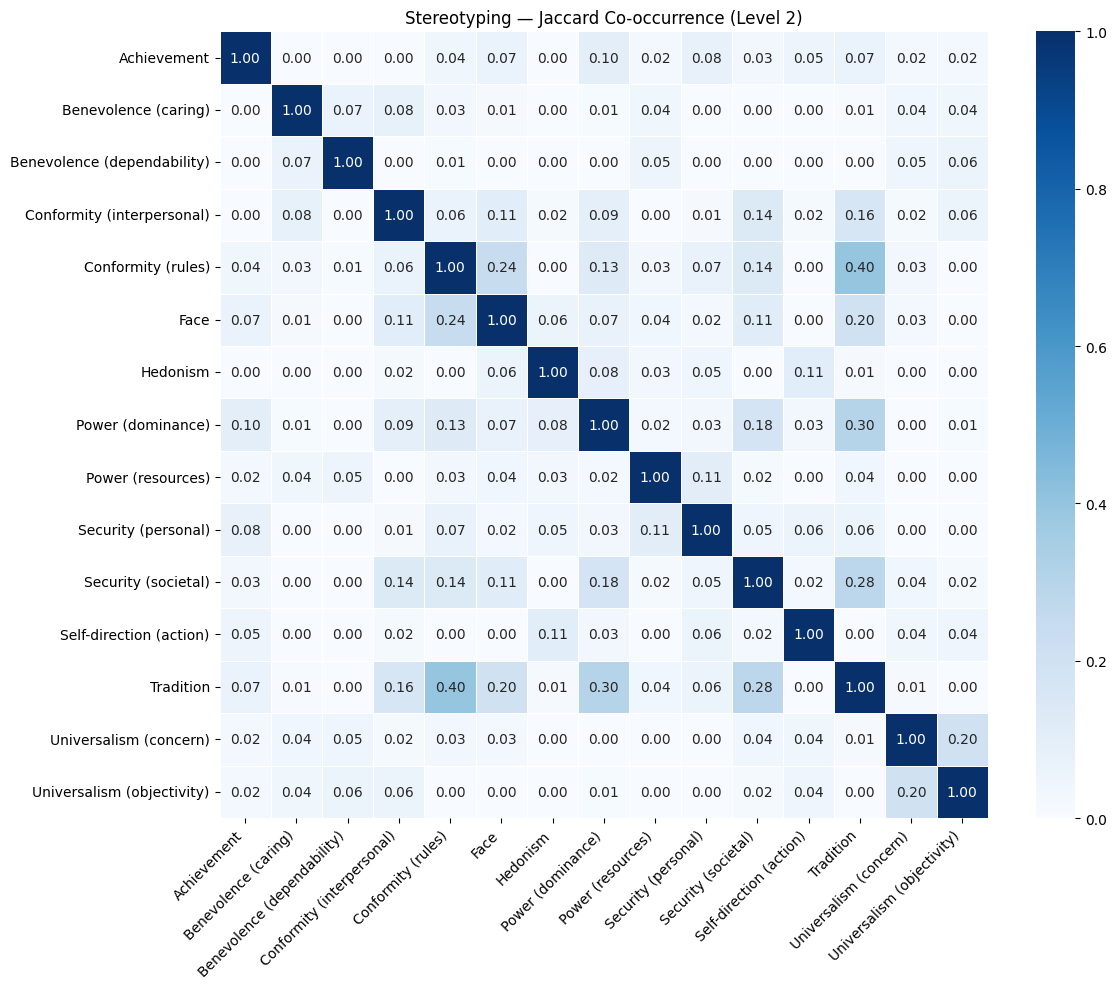

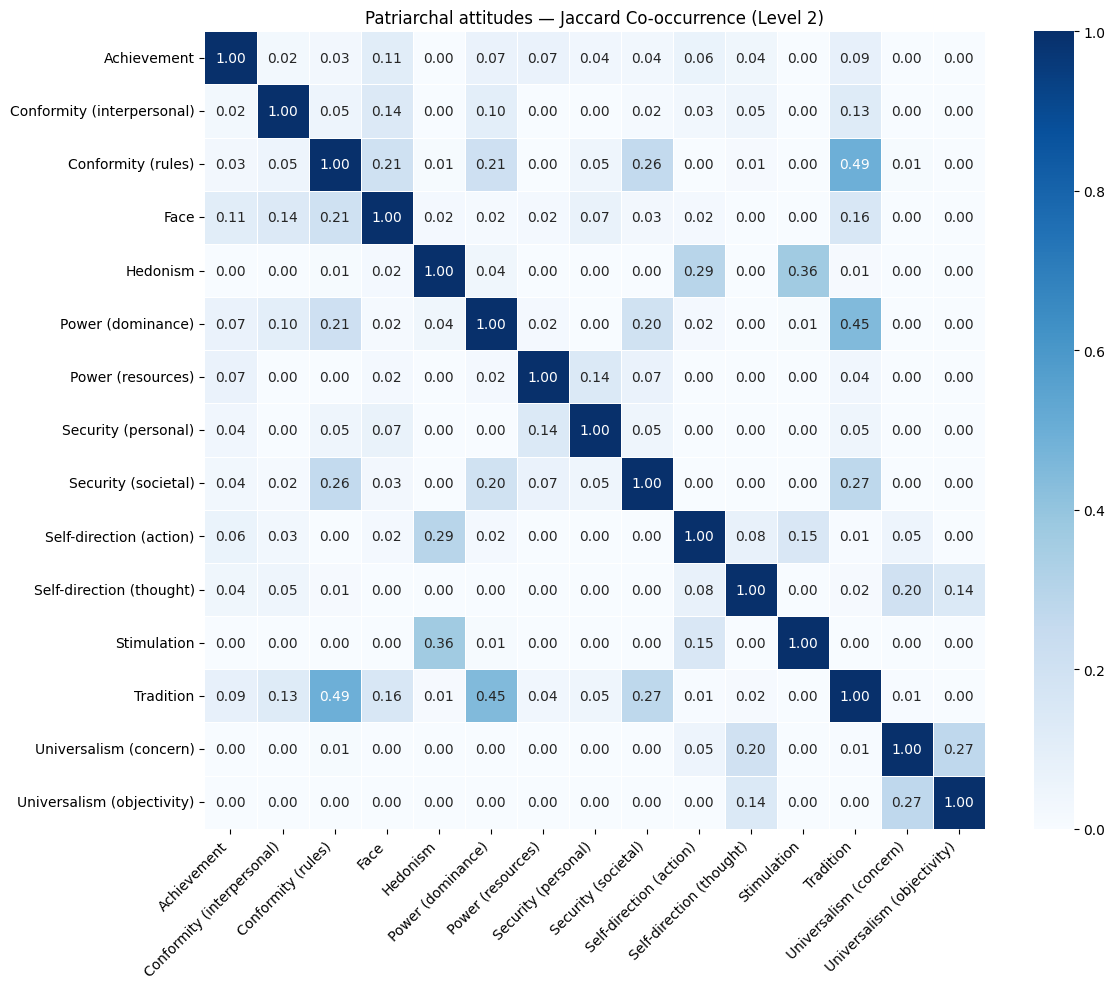

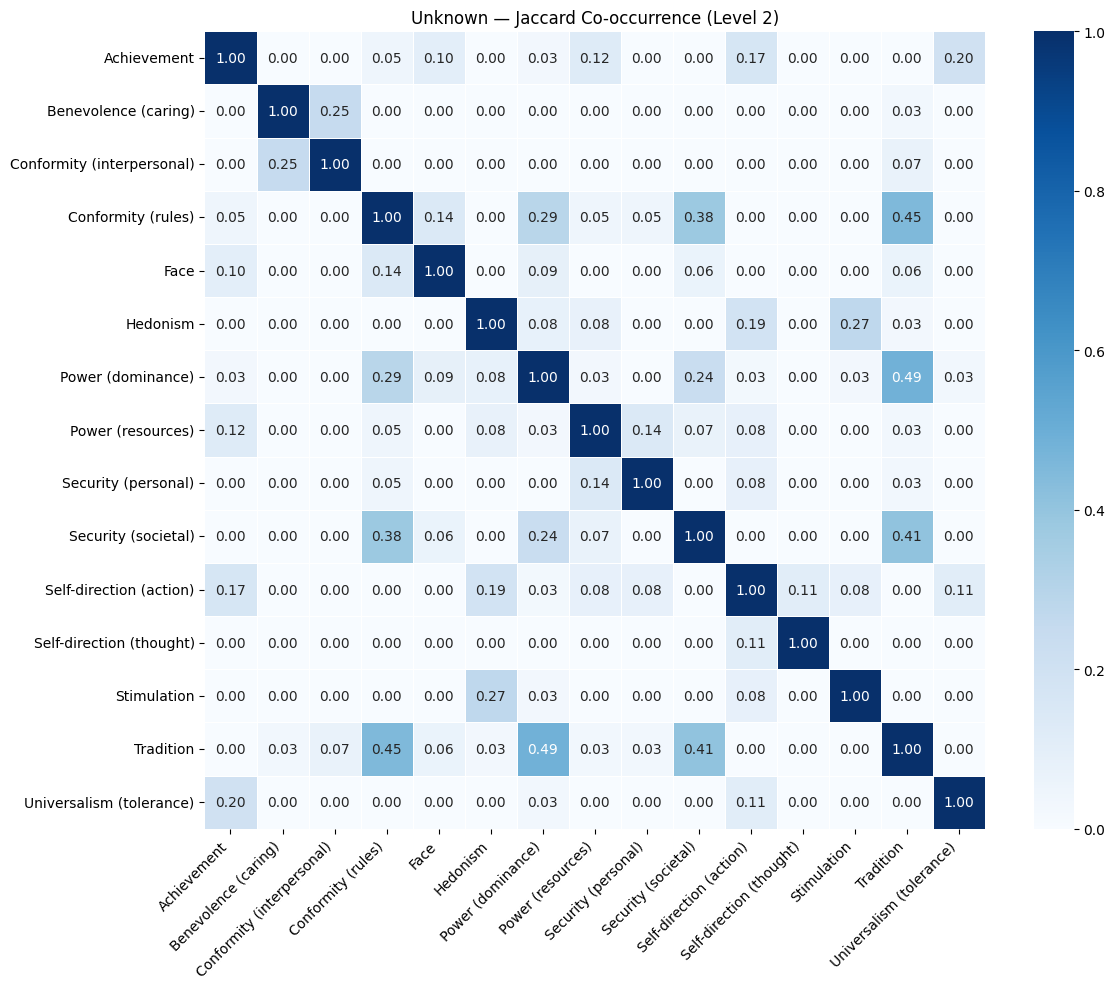

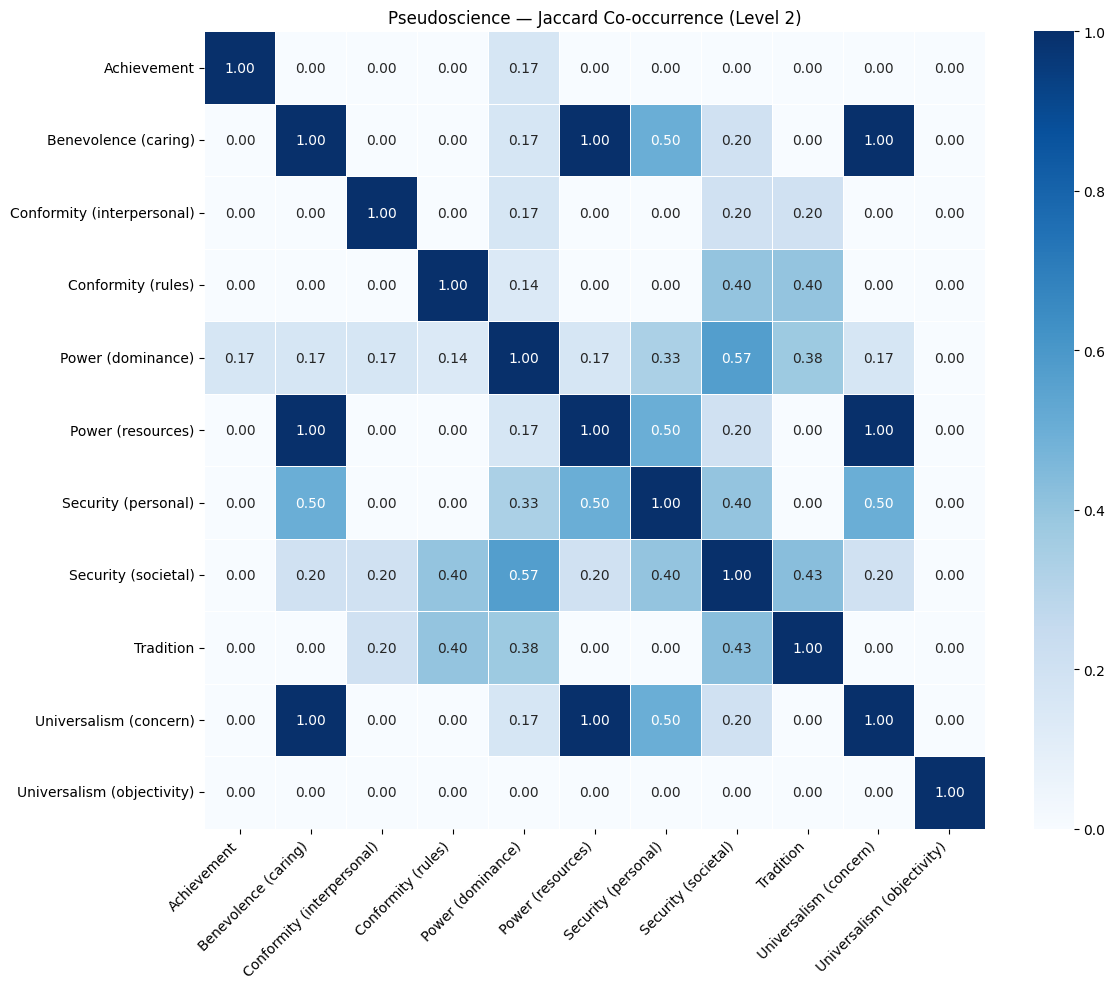

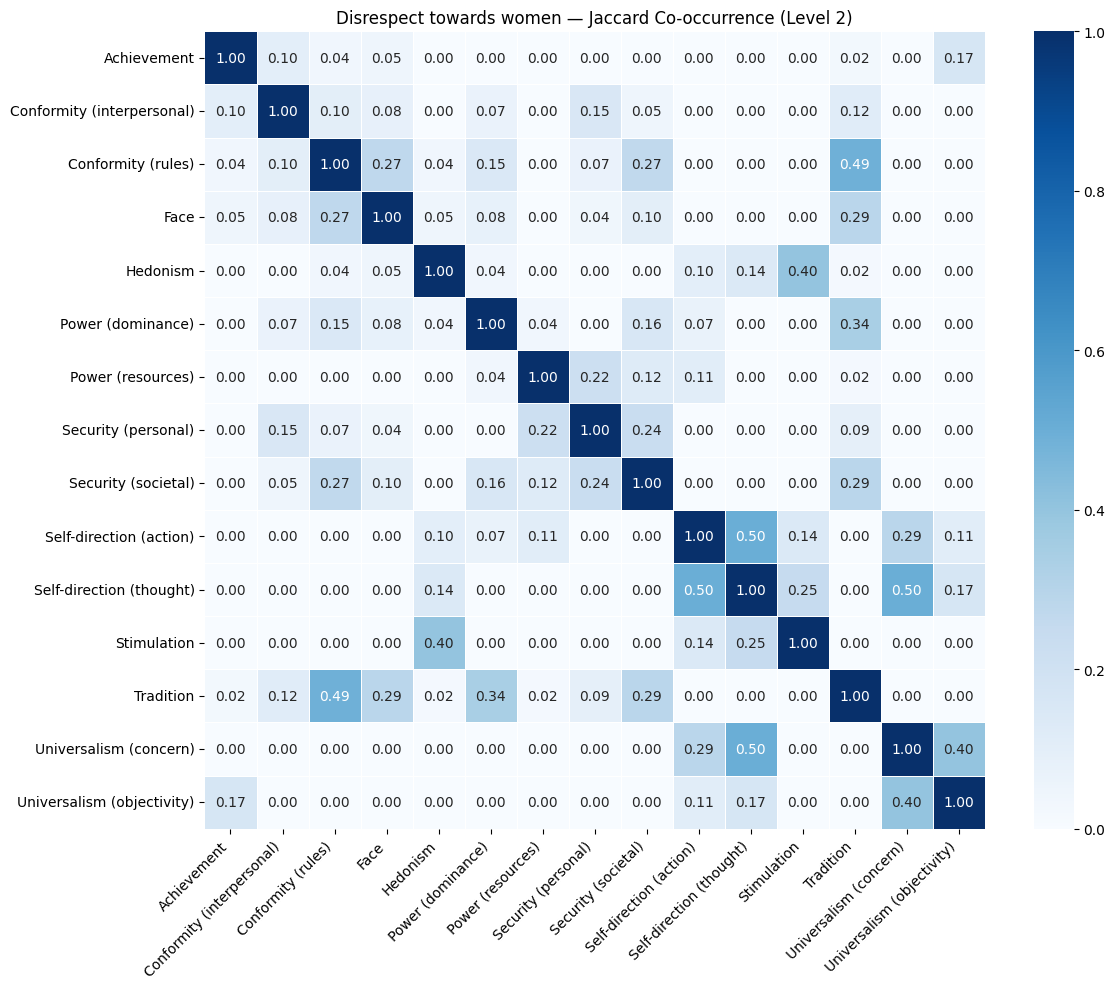

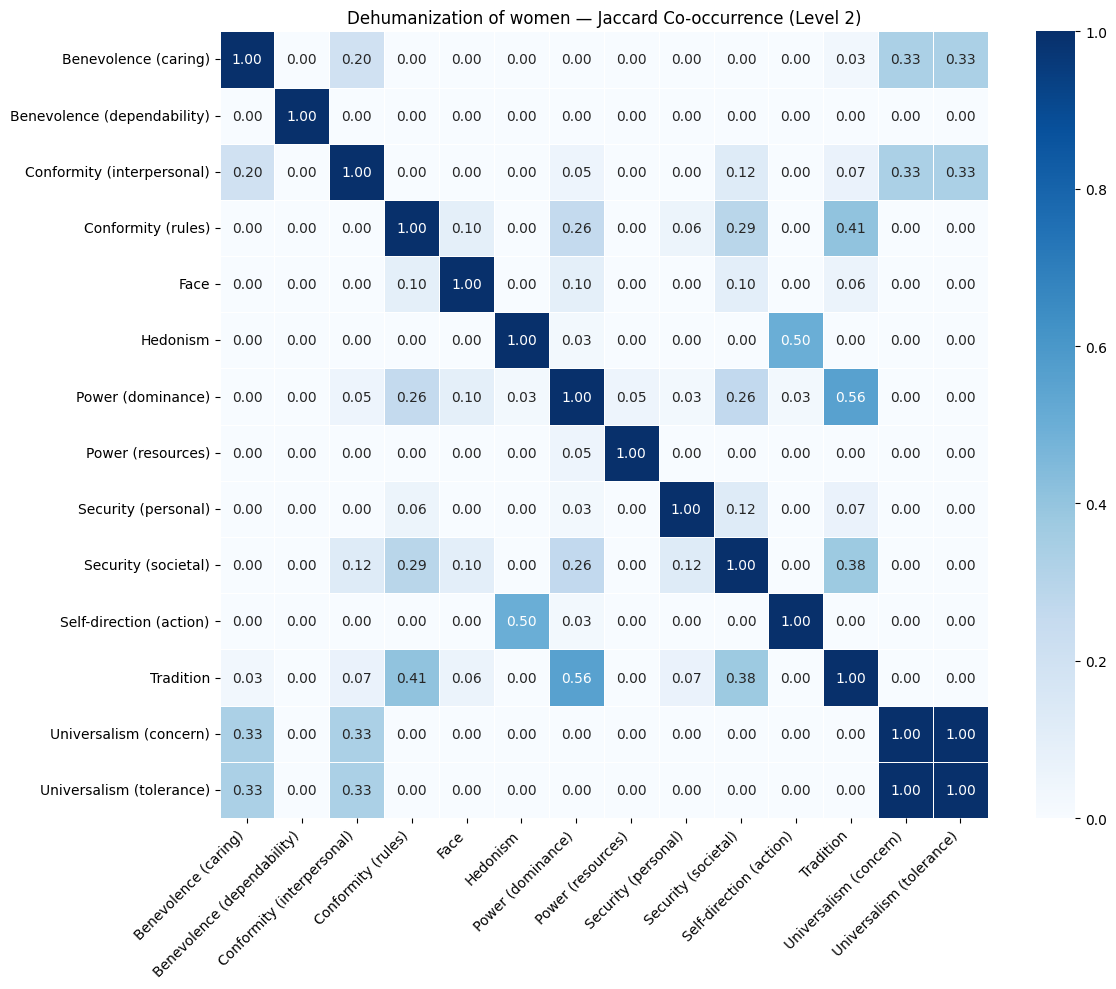

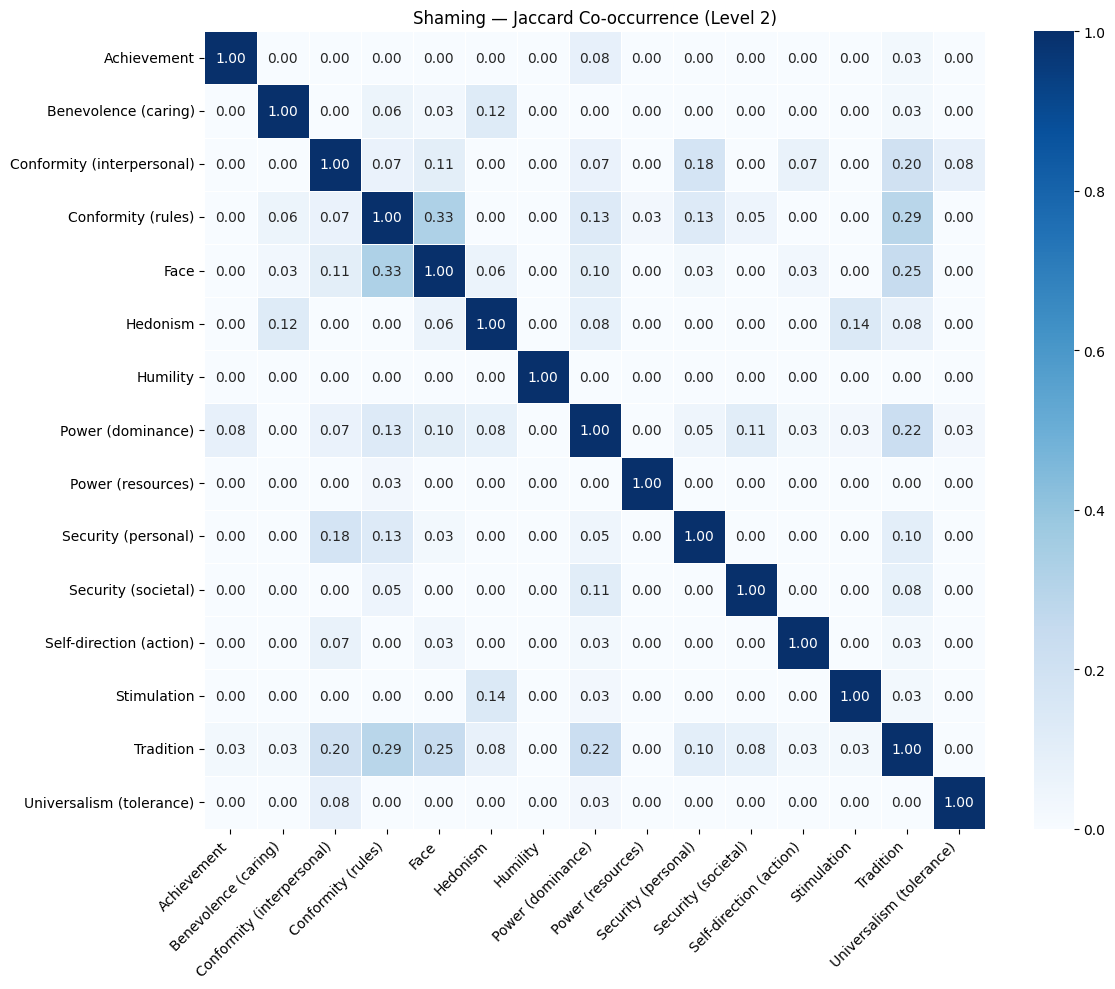

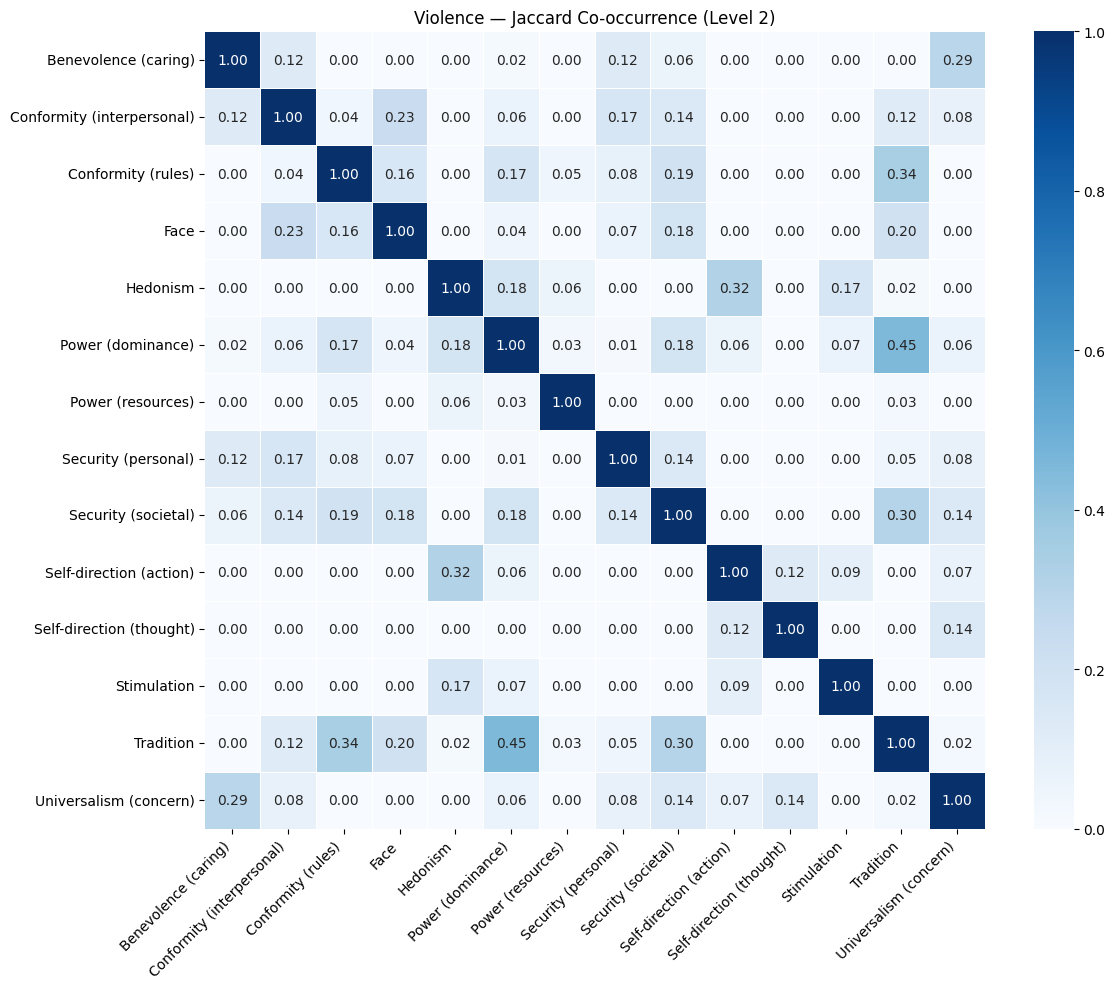

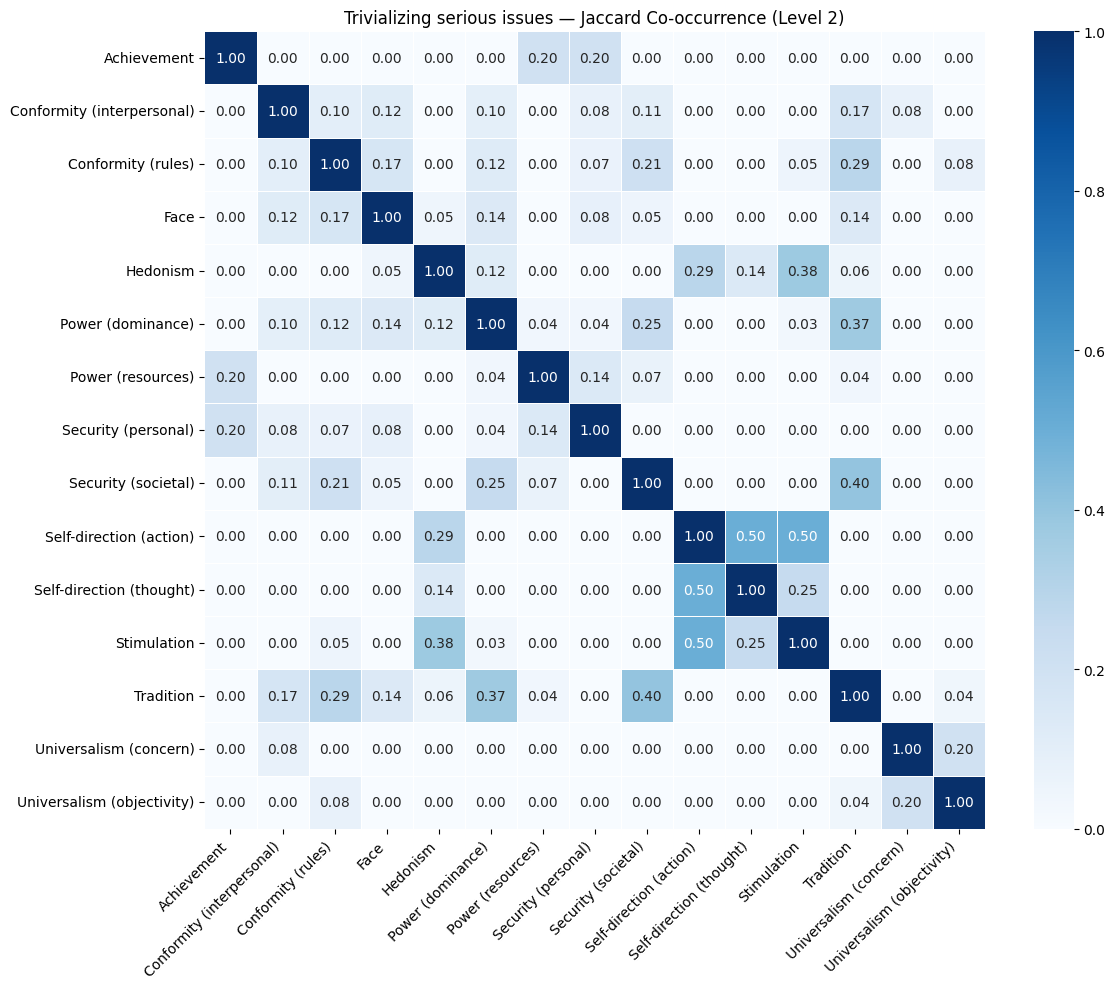

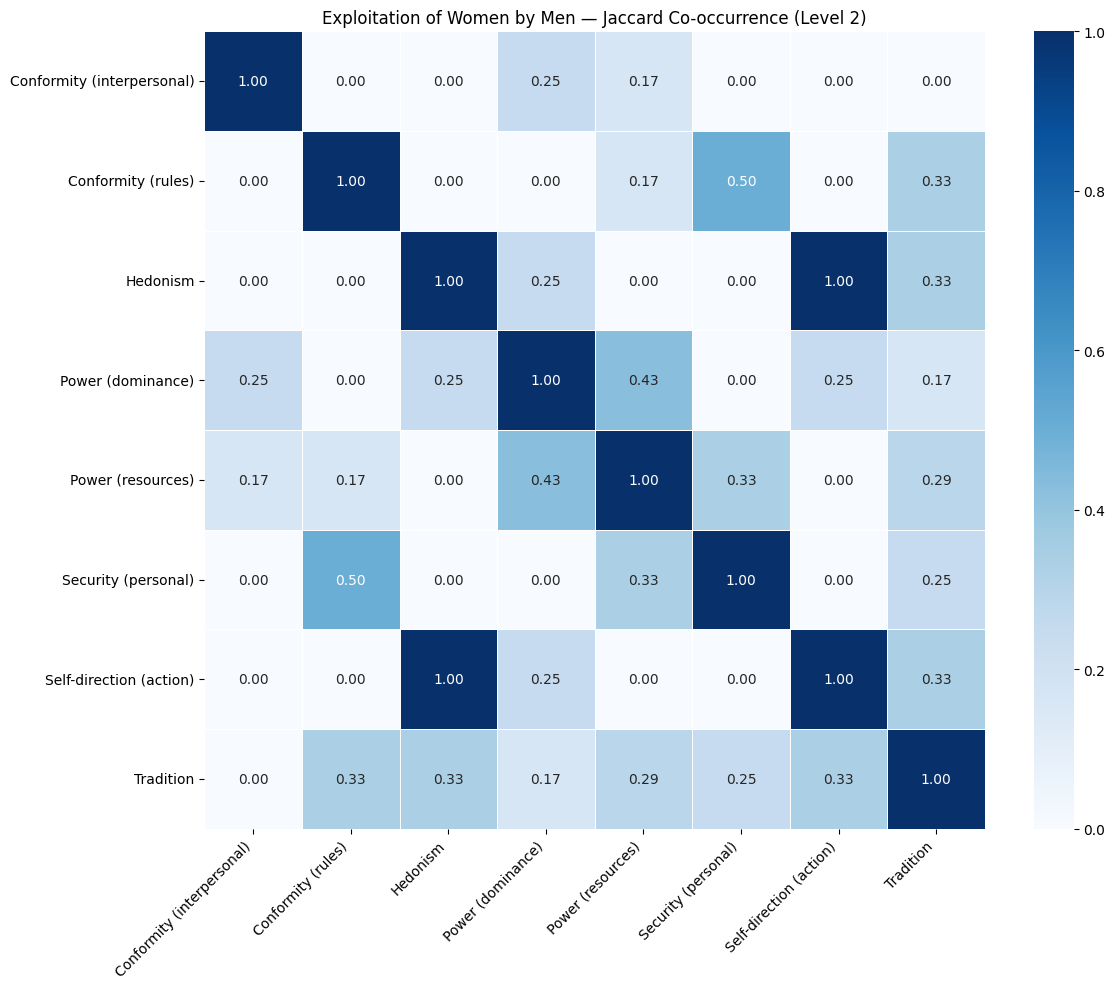

In [18]:
by_cat = get_value_sets_by_category(level=2)
for cat, sets in by_cat.items():
    if len(sets) < 5:
        continue
    df = compute_normalized_cooccurrence(sets, top_n=15)
    plot_cooccurrence_heatmap(df, f"{cat} — Jaccard Co-occurrence (Level 2)", normalize=True)

In [ ]:
def count_total_final_frames(final_frames_dir="final_frames"):
    unique_ids = set()
    per_problem_counts = {}

    for problem in os.listdir(final_frames_dir):
        problem_path = os.path.join(final_frames_dir, problem, "frames.jsonl")
        if os.path.isfile(problem_path):
            with open(problem_path, 'r') as f:
                ids_in_problem = set()
                for line in f:
                    try:
                        frame = json.loads(line)
                        frame_id = frame.get("id")
                        if frame_id:
                            unique_ids.add(frame_id)
                            ids_in_problem.add(frame_id)
                    except json.JSONDecodeError:
                        continue  # skip malformed lines
                per_problem_counts[problem] = len(ids_in_problem)

    for problem, count in per_problem_counts.items():
        print(f"{problem}: {count} unique frame(s)")

    print(f"\nTotal number of unique final frames across all problems: {len(unique_ids)}")
    return len(unique_ids)

count_total_final_frames()

Getting overall top values from all final values across each level

In [3]:
import os
import json
from collections import Counter

def extract_value_key(level):
    return {
        1: ("level_1_values", "level_1_value"),
        2: ("level_2_values", "level_2_value"),
        3: ("level_3_values", "level_3_value")
    }[level]

def get_top_values_across_all_problems(level=2, top_n=20, base_dir="final_frames"):
    """
    Returns the top-N most frequent values across all problems (deduplicated by frame ID).
    """
    value_container, value_key = extract_value_key(level)
    value_counter = Counter()
    seen_frame_ids = set()

    for problem_folder in os.listdir(base_dir):
        path = os.path.join(base_dir, problem_folder, "values.jsonl")
        if not os.path.isfile(path):
            continue

        with open(path, "r") as f:
            for line in f:
                try:
                    data = json.loads(line)
                    frame_id = data.get("id")
                    if not frame_id or frame_id in seen_frame_ids:
                        continue
                    seen_frame_ids.add(frame_id)

                    values = data.get("response", {}).get("values", {}).get(value_container, [])
                    for item in values:
                        val = item.get(value_key)
                        if val:
                            value_counter[val] += 1
                except json.JSONDecodeError:
                    continue

    top_values = value_counter.most_common(top_n)

    print(f"\nTop {top_n} unique-frame values at Level {level}:")
    for val, count in top_values:
        print(f"- {val}: {count}")
    
    return top_values


In [7]:
get_top_values_across_all_problems(level=3, top_n=10)


Top 10 unique-frame values at Level 3:
- Be respecting traditions: 536
- Have the right to command: 432
- Be behaving properly: 179
- Have a stable society: 175
- Be compliant: 175
- Have pleasure: 150
- Have a good reputation: 137
- Have influence: 128
- Have social recognition: 112
- Be polite: 102


[('Be respecting traditions', 536),
 ('Have the right to command', 432),
 ('Be behaving properly', 179),
 ('Have a stable society', 175),
 ('Be compliant', 175),
 ('Have pleasure', 150),
 ('Have a good reputation', 137),
 ('Have influence', 128),
 ('Have social recognition', 112),
 ('Be polite', 102)]

Getting frame problems in one place

In [1]:
import os
import json
from collections import defaultdict

def merge_frames_with_problems(root_folder, output_file):
    frame_map = {}

    # Traverse each subfolder in final_frames
    for problem in os.listdir(root_folder):
        problem_path = os.path.join(root_folder, problem)
        values_file = os.path.join(problem_path, "values.jsonl")

        if os.path.isdir(problem_path) and os.path.isfile(values_file):
            with open(values_file, "r", encoding="utf-8") as f:
                for line in f:
                    data = json.loads(line.strip())
                    key = (data["id"], data["frame"])
                    
                    if key not in frame_map:
                        frame_map[key] = {
                            "id": data["id"],
                            "frame": data["frame"],
                            "problems": [problem]
                        }
                    else:
                        if problem not in frame_map[key]["problems"]:
                            frame_map[key]["problems"].append(problem)

    # Write unique frames to output
    with open(output_file, "w", encoding="utf-8") as out:
        for frame_data in frame_map.values():
            out.write(json.dumps(frame_data, ensure_ascii=False) + "\n")

# Example usage
merge_frames_with_problems("final_frames", "frame_problem_info.jsonl")


Preparing actual Figure: value frquency

In [8]:
import os
import json
import pandas as pd
from collections import Counter, defaultdict

FINAL_FRAMES_DIR = "final_frames"


TARGET_MAIN_CATEGORIES = {
    "Objectification",
    "Stereotyping",
    "Trivializing serious issues",
    "Patriarchal attitudes",
    "Violence",
    "Discrimination of women",
}

def extract_value_key(level):
    return {
        1: ("level_1_values", "level_1_value"),
        2: ("level_2_values", "level_2_value"),
        3: ("level_3_values", "level_3_value")
    }[level]

def get_main_category(problem_name):
    return PROBLEM_TO_MAIN.get(problem_name, "Unknown")

value_container, value_key = extract_value_key(3)
category_value_counts = defaultdict(Counter)
seen_ids = set()

for problem_folder in os.listdir(FINAL_FRAMES_DIR):
    main_cat = get_main_category(problem_folder)
    if main_cat not in TARGET_MAIN_CATEGORIES:
        continue
    values_path = os.path.join(FINAL_FRAMES_DIR, problem_folder, "values.jsonl")
    if not os.path.isfile(values_path):
        continue

    with open(values_path) as f:
        for line in f:
            try:
                data = json.loads(line)
                frame_id = data.get("id")
                if not frame_id or (main_cat, frame_id) in seen_ids:
                    continue
                seen_ids.add((main_cat, frame_id))
                values = data.get("response", {}).get("values", {}).get(value_container, [])
                for v in values:
                    val = v.get(value_key)
                    if val:
                        category_value_counts[main_cat][val] += 1
            except json.JSONDecodeError:
                continue

df = pd.DataFrame(category_value_counts).fillna(0).astype(int)
df.index.name = "Value"
df.to_excel("level3_value_frequencies_by_category.xlsx")
print("Saved to level3_value_frequencies_by_category.xlsx")


Saved to level3_value_frequencies_by_category.xlsx


In [ ]:
VALID_LEVEL3_VALUES = set([
    v.lower().strip() for v in [
        "Be creative", "Be curious", "Have freedom of thought",
        "Be choosing own goals", "Be independent", "Have freedom of action", "Have privacy",
        "Have an exciting life", "Have a varied life", "Be daring",
        "Have pleasure", "Be ambitious", "Have success", "Be capable",
        "Be intellectual", "Be courageous", "Have influence", "Have the right to command",
        "Have wealth", "Have social recognition", "Have a good reputation",
        "Have a sense of belonging", "Have good health", "Have no debts",
        "Be neat and tidy", "Have a comfortable life", "Have a safe country",
        "Have a stable society", "Be respecting traditions", "Be holding religious faith",
        "Be compliant", "Be self-disciplined", "Be behaving properly", "Be polite",
        "Be honoring elders", "Be humble", "Have life accepted as is", "Be helpful",
        "Be honest", "Be forgiving", "Have the own family secured", "Be loving",
        "Be responsible", "Have loyalty towards friends", "Have equality", "Be just",
        "Have a world at peace", "Be protecting the environment", "Have harmony with nature",
        "Have a world of beauty", "Be broadminded", "Have the wisdom to accept others",
        "Be logical", "Have an objective view"
    ]
])
len(VALID_LEVEL3_VALUES)

TARGET_MAIN_CATEGORIES = {
    "Objectification",
    "Stereotyping",
    "Trivializing serious issues",
    "Patriarchal attitudes",
    "Violence",
    "Discrimination of women",
}

54

In [18]:
import os, json
from collections import defaultdict, Counter
import pandas as pd

FINAL_FRAMES_DIR = "final_frames"  # Change if different

def get_main_category(problem_name):
    # Assuming you already have PROBLEM_TO_MAIN mapping
    return PROBLEM_TO_MAIN.get(problem_name, "Unknown")

def get_cleaned_value(val):
    return val.strip().lower()

def analyze_level3_value_distribution():
    valid_counter = defaultdict(Counter)
    invalid_values = Counter()

    for problem_folder in os.listdir(FINAL_FRAMES_DIR):
        main_cat = get_main_category(problem_folder)
        if main_cat not in TARGET_MAIN_CATEGORIES:
            continue

        file_path = os.path.join(FINAL_FRAMES_DIR, problem_folder, "values.jsonl")
        if not os.path.exists(file_path):
            continue

        with open(file_path) as f:
            for line in f:
                data = json.loads(line)
                values = data.get("response", {}).get("values", {}).get("level_3_values", [])
                for v in values:
                    raw = v.get("level_3_value", "").strip()
                    cleaned = get_cleaned_value(raw)
                    if cleaned in VALID_LEVEL3_VALUES:
                        valid_counter[main_cat][cleaned] += 1
                    elif cleaned:  # count invalids (non-empty)
                        invalid_values[cleaned] += 1

    # Normalize: convert counts to percentages
    percent_df = pd.DataFrame(valid_counter).fillna(0).astype(int)
    percent_df = percent_df.apply(lambda col: (col / col.sum() * 100).round(2), axis=0)
    df.to_excel("level3_value_frequencies_by_category.xlsx")

    return percent_df, invalid_values

In [19]:
_, invalid=analyze_level3_value_distribution()


In [20]:
sum(invalid.values())

63

In [8]:
import re
import json

def clean_problem_names(problem_dict):
    def clean_key(key):
        # Remove leading numbers like '10.13 ', '7.4.1 ', etc.
        key = re.sub(r'^\d+(\.\d+)*\s*', '', key)
        # Convert to lowercase
        key = key.lower()
        # Replace spaces and apostrophes with underscores
        key = key.replace(' ', '_').replace("'", "_")
        return key

    def recursive_clean(d):
        new_dict = {}
        for key, value in d.items():
            cleaned_key = clean_key(key)
            if isinstance(value, dict):
                new_dict[cleaned_key] = recursive_clean(value)
            else:
                new_dict[cleaned_key] = value
        return new_dict

    return recursive_clean(problem_dict)

In [9]:
input_path = "misogyny_problem_definitions.json"
output_path = "cleaned_misogyny_problem_definitions.json"
with open(input_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Clean
cleaned_data = clean_problem_names(data)
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(cleaned_data, f, indent=2, ensure_ascii=False)

Co-occurence for papaer

Loading data from all problem folders...
Loaded 1208 entries from final_frames
Extracting level 2 values...
Found 1208 entries with level 2 values

Most common level 2 values:
  Tradition: 604
  Power (dominance): 568
  Conformity (rules): 411
  Face: 275
  Security (societal): 194
  Hedonism: 168
  Conformity (interpersonal): 136
  Security (personal): 80
  Achievement: 79
  Power (resources): 70

Calculating co-occurrence matrix...
Normalizing co-occurrence matrix...
Creating and displaying heatmap...


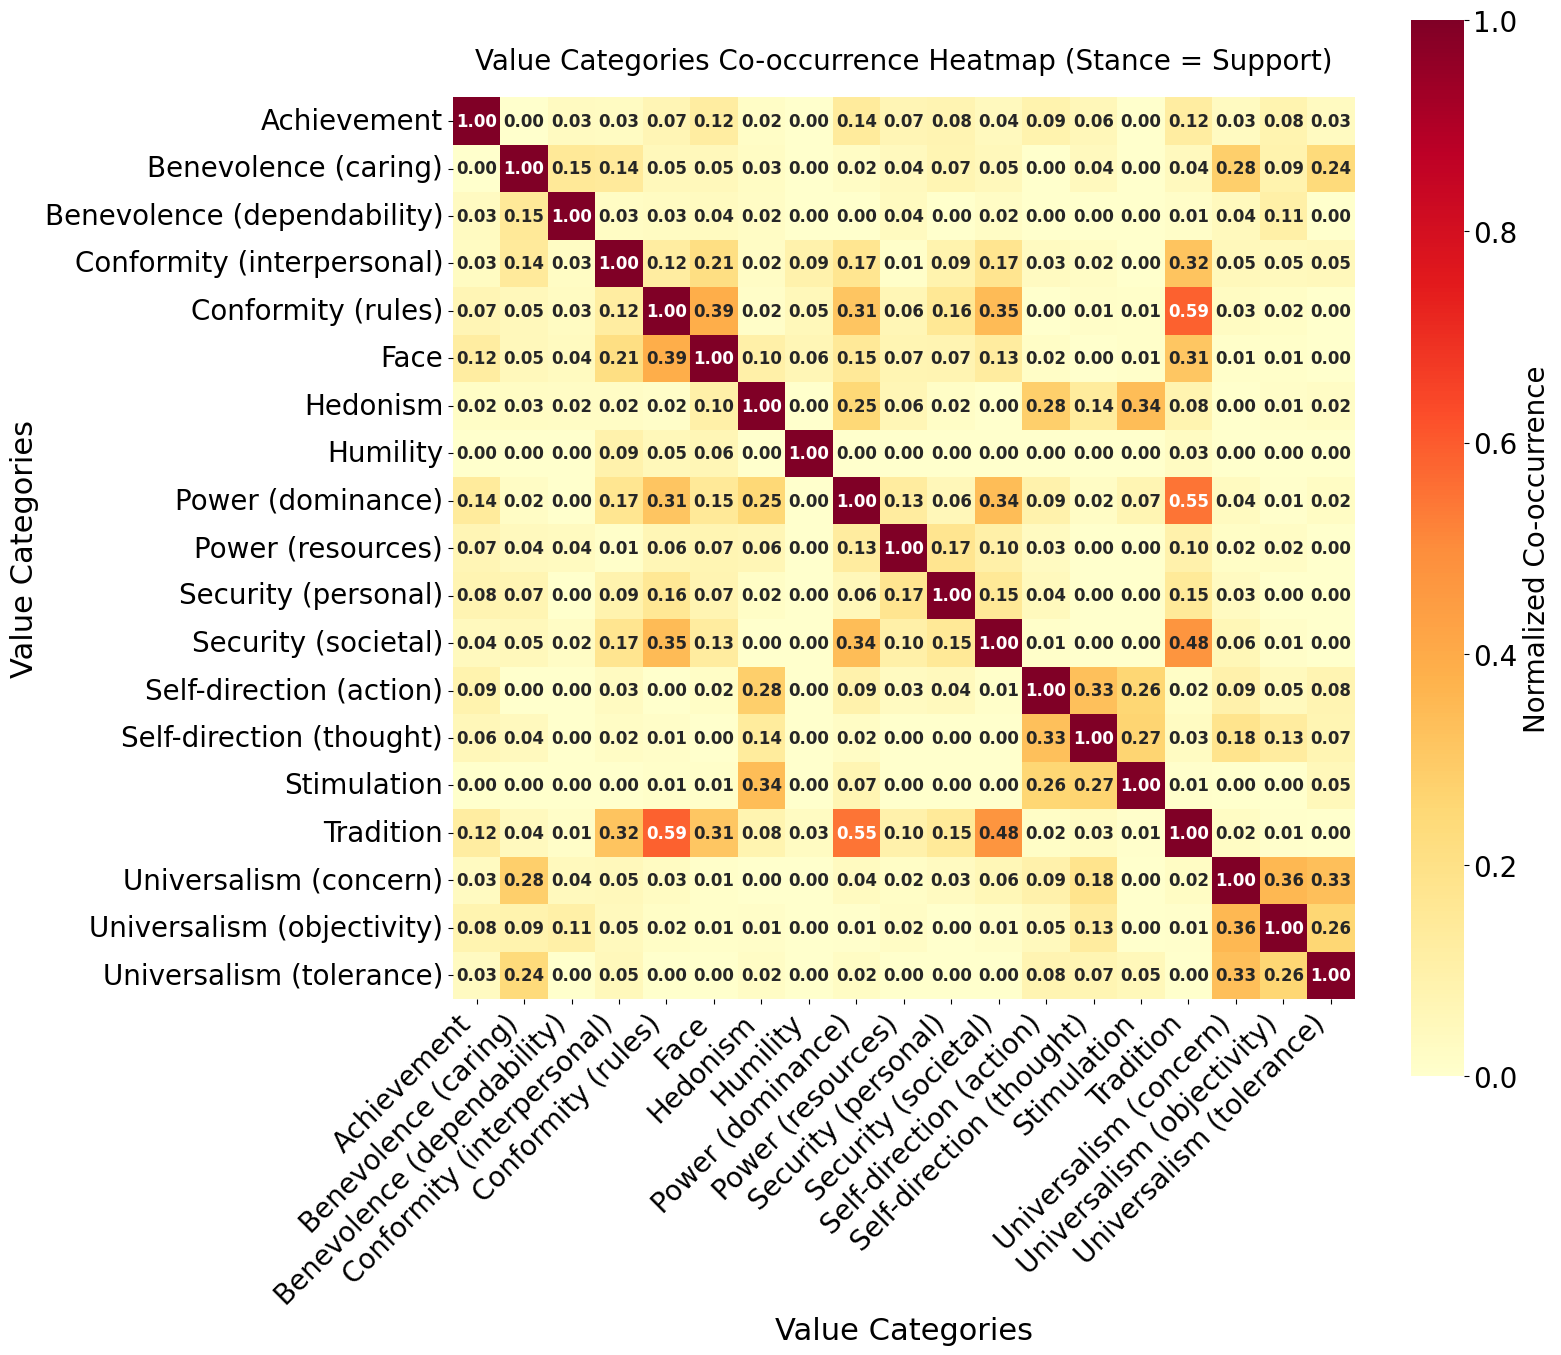

Saving results...

Results saved:
- level2_values_cooccurrence_normalized.csv
- level2_values_cooccurrence_heatmap.png

Heatmap is displayed above.


(                             Achievement  Benevolence (caring)  \
 Achievement                     1.000000              0.000000   
 Benevolence (caring)            0.000000              1.000000   
 Benevolence (dependability)     0.033923              0.148704   
 Conformity (interpersonal)      0.028943              0.140971   
 Conformity (rules)              0.066596              0.048655   
 Face                            0.122344              0.049659   
 Hedonism                        0.017360              0.025367   
 Humility                        0.000000              0.000000   
 Power (dominance)               0.136902              0.020694   
 Power (resources)               0.067237              0.039299   
 Security (personal)             0.075473              0.073521   
 Security (societal)             0.040388              0.047213   
 Self-direction (action)         0.088639              0.000000   
 Self-direction (thought)        0.056254              0.04110

<Figure size 640x480 with 0 Axes>

In [5]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from itertools import combinations

def load_all_values_data(folder_path):
    """Load all values.jsonl files from problem folders"""
    all_data = []
    
    for problem_folder in os.listdir(folder_path):
        problem_path = os.path.join(folder_path, problem_folder)
        
        if os.path.isdir(problem_path):
            values_file = os.path.join(problem_path, 'values.jsonl')
            
            if os.path.exists(values_file):
                try:
                    with open(values_file, 'r', encoding='utf-8') as f:
                        for line in f:
                            line = line.strip()
                            if line:
                                data = json.loads(line)
                                all_data.append(data)
                except Exception as e:
                    print(f"Error reading {values_file}: {e}")
    
    return all_data

def extract_level2_values(data):
    """Extract level_2_values from all entries"""
    level2_values_per_entry = []
    
    for entry in data:
        if 'response' in entry and 'values' in entry['response']:
            values = entry['response']['values']
            if 'level_2_values' in values:
                entry_values = [item['level_2_value'] for item in values['level_2_values']]
                level2_values_per_entry.append(entry_values)
    
    return level2_values_per_entry

def calculate_cooccurrence_matrix(values_per_entry):
    """Calculate co-occurrence matrix for level 2 values"""
    # Get all unique values
    all_values = set()
    for entry_values in values_per_entry:
        all_values.update(entry_values)
    
    all_values = sorted(list(all_values))
    n_values = len(all_values)
    
    # Initialize co-occurrence matrix
    cooccurrence_matrix = np.zeros((n_values, n_values))
    
    # Count co-occurrences
    for entry_values in values_per_entry:
        # Count pairs of values that appear together
        for i, val1 in enumerate(all_values):
            for j, val2 in enumerate(all_values):
                if val1 in entry_values and val2 in entry_values:
                    cooccurrence_matrix[i, j] += 1
    
    return cooccurrence_matrix, all_values

def normalize_cooccurrence_matrix(cooccurrence_matrix):
    """Normalize the co-occurrence matrix"""
    # Get diagonal (self-occurrences) for normalization
    diagonal = np.diag(cooccurrence_matrix).reshape(-1, 1)
    
    # Avoid division by zero
    diagonal = np.where(diagonal == 0, 1, diagonal)
    
    # Normalize by geometric mean of marginal frequencies
    normalization_matrix = np.sqrt(diagonal @ diagonal.T)
    normalized_matrix = cooccurrence_matrix / normalization_matrix
    
    return normalized_matrix

def create_heatmap(matrix, labels, title="Value Categories Co-occurrence Heatmap (Stance = Support)"):
    """Create and display heatmap with customizable font sizes"""
    plt.figure(figsize=(16, 14))
    
    # Create heatmap with customizable font sizes
    sns.heatmap(matrix, 
                xticklabels=labels, 
                yticklabels=labels,
                annot=True, 
                fmt='.2f',
                cmap='YlOrRd',
                square=True,
                cbar_kws={'label': 'Normalized Co-occurrence'},
                annot_kws={'fontsize': 12, 'fontweight': 'bold'})  # Font size for annotations
    
    plt.title(title, fontsize=20, pad=20)
    plt.xlabel('Value Categories', fontsize=22)
    plt.ylabel('Value Categories', fontsize=22)
    
    # Rotate labels for better readability with custom font sizes
    plt.xticks(rotation=45, ha='right', fontsize=20)
    plt.yticks(rotation=0, fontsize=20)
    
    # Adjust colorbar label font size
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label('Normalized Co-occurrence', fontsize=20)
    
    plt.tight_layout()
    plt.savefig('level2_values_cooccurrence_heatmap.png', dpi=300, bbox_inches='tight') 
    
    # Display the figure
    plt.show()
    
    # Keep the figure reference for saving
    fig = plt.gcf()
    
    return fig

def main():
    # Set the folder path
    folder_path = 'final_frames'
    
    print("Loading data from all problem folders...")
    all_data = load_all_values_data(folder_path)
    print(f"Loaded {len(all_data)} entries from {folder_path}")
    
    if not all_data:
        print("No data found. Please check the folder path and file structure.")
        return
    
    print("Extracting level 2 values...")
    values_per_entry = extract_level2_values(all_data)
    print(f"Found {len(values_per_entry)} entries with level 2 values")
    
    # Show some statistics
    all_values_flat = [val for entry in values_per_entry for val in entry]
    value_counts = Counter(all_values_flat)
    print(f"\nMost common level 2 values:")
    for value, count in value_counts.most_common(10):
        print(f"  {value}: {count}")
    
    print("\nCalculating co-occurrence matrix...")
    cooccurrence_matrix, value_labels = calculate_cooccurrence_matrix(values_per_entry)
    
    print("Normalizing co-occurrence matrix...")
    normalized_matrix = normalize_cooccurrence_matrix(cooccurrence_matrix)
    
    print("Creating and displaying heatmap...")
    fig = create_heatmap(normalized_matrix, value_labels)
    
    # Save the results as CSV
    print("Saving results...")
    df = pd.DataFrame(normalized_matrix, index=value_labels, columns=value_labels)
    df.to_csv('level2_values_cooccurrence_normalized.csv')
    
    print("\nResults saved:")
    print("- level2_values_cooccurrence_normalized.csv")
    print("- level2_values_cooccurrence_heatmap.png")
    print("\nHeatmap is displayed above.")
    
    return df, normalized_matrix, value_labels

# Run the main function
main()

Loading data from all problem folders...
Loaded 1208 entries from final_frames
Extracting level 2 values...
Found 1208 entries with level 2 values

Most common level 2 values:
  Universalism (concern): 1162
  Universalism (tolerance): 1007
  Self-direction (action): 918
  Self-direction (thought): 898
  Benevolence (caring): 685
  Universalism (objectivity): 430
  Benevolence (dependability): 68
  Security (personal): 58
  Achievement: 52
  Conformity (interpersonal): 51

Calculating co-occurrence matrix...
Normalizing co-occurrence matrix...
Creating and displaying heatmap...


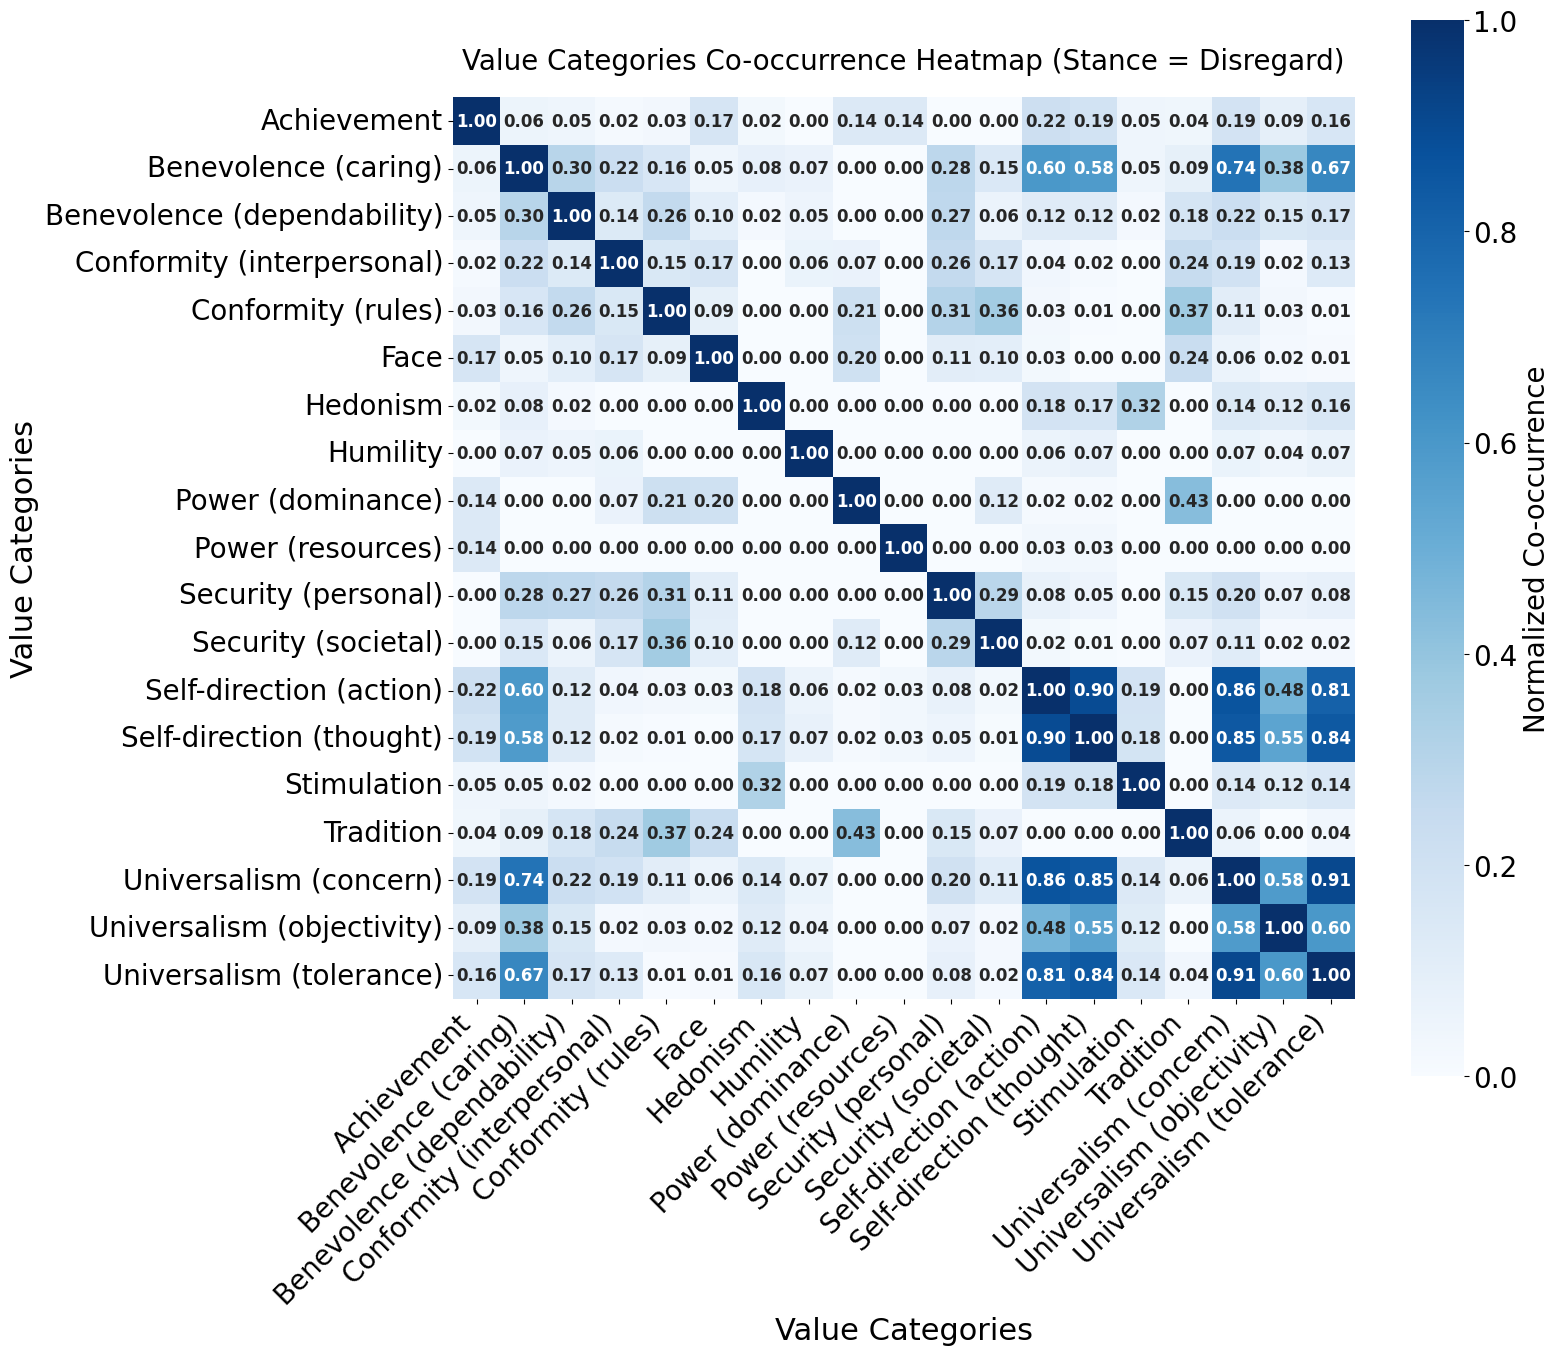

Saving results...

Results saved:
- level2_values_cooccurrence_normalized.csv
- level2_values_cooccurrence_heatmap.png

Heatmap is displayed above.


(                             Achievement  Benevolence (caring)  \
 Achievement                     1.000000              0.058284   
 Benevolence (caring)            0.058284              1.000000   
 Benevolence (dependability)     0.050450              0.296538   
 Conformity (interpersonal)      0.019418              0.224708   
 Conformity (rules)              0.029566              0.162920   
 Face                            0.169842              0.046795   
 Hedonism                        0.024907              0.082348   
 Humility                        0.000000              0.068349   
 Power (dominance)               0.138675              0.000000   
 Power (resources)               0.138675              0.000000   
 Security (personal)             0.000000              0.280950   
 Security (societal)             0.000000              0.148269   
 Self-direction (action)         0.215117              0.599000   
 Self-direction (thought)        0.189733              0.58268

<Figure size 640x480 with 0 Axes>

In [6]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from itertools import combinations

def load_all_values_data(folder_path):
    """Load all values.jsonl files from problem folders"""
    all_data = []
    
    for problem_folder in os.listdir(folder_path):
        problem_path = os.path.join(folder_path, problem_folder)
        
        if os.path.isdir(problem_path):
            values_file = os.path.join(problem_path, 'values_contra2.jsonl')
            
            if os.path.exists(values_file):
                try:
                    with open(values_file, 'r', encoding='utf-8') as f:
                        for line in f:
                            line = line.strip()
                            if line:
                                data = json.loads(line)
                                all_data.append(data)
                except Exception as e:
                    print(f"Error reading {values_file}: {e}")
    
    return all_data

def extract_level2_values(data):
    """Extract level_2_values from all entries"""
    level2_values_per_entry = []
    
    for entry in data:
        if 'response' in entry and 'values' in entry['response']:
            values = entry['response']['values']
            if 'level_2_values' in values:
                entry_values = [item['level_2_value'] for item in values['level_2_values']]
                level2_values_per_entry.append(entry_values)
    
    return level2_values_per_entry

def calculate_cooccurrence_matrix(values_per_entry):
    """Calculate co-occurrence matrix for level 2 values"""
    # Get all unique values
    all_values = set()
    for entry_values in values_per_entry:
        all_values.update(entry_values)
    
    all_values = sorted(list(all_values))
    n_values = len(all_values)
    
    # Initialize co-occurrence matrix
    cooccurrence_matrix = np.zeros((n_values, n_values))
    
    # Count co-occurrences
    for entry_values in values_per_entry:
        # Count pairs of values that appear together
        for i, val1 in enumerate(all_values):
            for j, val2 in enumerate(all_values):
                if val1 in entry_values and val2 in entry_values:
                    cooccurrence_matrix[i, j] += 1
    
    return cooccurrence_matrix, all_values

def normalize_cooccurrence_matrix(cooccurrence_matrix):
    """Normalize the co-occurrence matrix"""
    # Get diagonal (self-occurrences) for normalization
    diagonal = np.diag(cooccurrence_matrix).reshape(-1, 1)
    
    # Avoid division by zero
    diagonal = np.where(diagonal == 0, 1, diagonal)
    
    # Normalize by geometric mean of marginal frequencies
    normalization_matrix = np.sqrt(diagonal @ diagonal.T)
    normalized_matrix = cooccurrence_matrix / normalization_matrix
    
    return normalized_matrix

def create_heatmap(matrix, labels, title="Value Categories Co-occurrence Heatmap (Stance = Disregard)"):
    """Create and display heatmap with customizable font sizes"""
    plt.figure(figsize=(16, 14))
    
    # Create heatmap with customizable font sizes
    sns.heatmap(matrix, 
                xticklabels=labels, 
                yticklabels=labels,
                annot=True, 
                fmt='.2f',
                cmap='Blues',
                square=True,
                cbar_kws={'label': 'Normalized Co-occurrence'},
                annot_kws={'fontsize': 12, 'fontweight': 'bold'})  # Font size for annotations
    
    plt.title(title, fontsize=20, pad=20)
    plt.xlabel('Value Categories', fontsize=22)
    plt.ylabel('Value Categories', fontsize=22)
    
    # Rotate labels for better readability with custom font sizes
    plt.xticks(rotation=45, ha='right', fontsize=20)
    plt.yticks(rotation=0, fontsize=20)
    
    # Adjust colorbar label font size
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label('Normalized Co-occurrence', fontsize=20)
    
    plt.tight_layout()
    plt.savefig('level2_values_contra_cooccurrence_heatmap.png', dpi=300, bbox_inches='tight') 
    
    # Display the figure
    plt.show()
    
    # Keep the figure reference for saving
    fig = plt.gcf()
    
    return fig

def main():
    # Set the folder path
    folder_path = 'final_frames'
    
    print("Loading data from all problem folders...")
    all_data = load_all_values_data(folder_path)
    print(f"Loaded {len(all_data)} entries from {folder_path}")
    
    if not all_data:
        print("No data found. Please check the folder path and file structure.")
        return
    
    print("Extracting level 2 values...")
    values_per_entry = extract_level2_values(all_data)
    print(f"Found {len(values_per_entry)} entries with level 2 values")
    
    # Show some statistics
    all_values_flat = [val for entry in values_per_entry for val in entry]
    value_counts = Counter(all_values_flat)
    print(f"\nMost common level 2 values:")
    for value, count in value_counts.most_common(10):
        print(f"  {value}: {count}")
    
    print("\nCalculating co-occurrence matrix...")
    cooccurrence_matrix, value_labels = calculate_cooccurrence_matrix(values_per_entry)
    
    print("Normalizing co-occurrence matrix...")
    normalized_matrix = normalize_cooccurrence_matrix(cooccurrence_matrix)
    
    print("Creating and displaying heatmap...")
    fig = create_heatmap(normalized_matrix, value_labels)
    
    # Save the results as CSV
    print("Saving results...")
    df = pd.DataFrame(normalized_matrix, index=value_labels, columns=value_labels)
    df.to_csv('level2_values_cooccurrence_normalized.csv')
    
    print("\nResults saved:")
    print("- level2_values_cooccurrence_normalized.csv")
    print("- level2_values_cooccurrence_heatmap.png")
    print("\nHeatmap is displayed above.")
    
    return df, normalized_matrix, value_labels

# Run the main function
main()

Spider diagram

In [6]:
from collections import Counter
import json
import os
value_count_stereo=Counter()
value_count_stereo_c=Counter()
def read_jsonl(path):
    with open(path, "r") as f:
        for line in f:
            line = line.strip()
            if line:
                ex = json.loads(line)
                yield ex

def write_jsonl(path, data):
    with open(path, "w") as f:
        for ex in data:
            f.write(json.dumps(ex) + "\n")

stereo=["stereotyping","false_equivalence","deflection","misunderstanding_feminism","mistrust_in_women","biased_judgement","false_accusations","scapegoating","divisiveness","misrepresentation","reductionism","commitment_phobia"]
data_path='final_frames'


for folder in stereo:
    path=f"{data_path}/{folder}/values.jsonl"
    if not os.path.exists(path):
        continue
    for line in read_jsonl(path):
        values=line.get("response", {}).get("values", {}).get("level_2_values", [])
        for v in values:
            val=v.get("level_2_value")
            if val:
                value_count_stereo[val]+=1
    path2=f"{data_path}/{folder}/values_contra2.jsonl"
    if not os.path.exists(path2):
        continue
    for line in read_jsonl(path2):
        values=line.get("response", {}).get("values", {}).get("level_2_values", [])
        for v in values:
            val=v.get("level_2_value")
            if val:
                value_count_stereo_c[val]+=1

value_count=Counter()
value_count_c=Counter()

for folder in os.listdir(data_path):
    path=f"{data_path}/{folder}/values.jsonl"
    if not os.path.exists(path):
        continue
    for line in read_jsonl(path):
        values=line.get("response", {}).get("values", {}).get("level_2_values", [])
        for v in values:
            val=v.get("level_2_value")
            if val:
                value_count[val]+=1
    path2=f"{data_path}/{folder}/values_contra2.jsonl"
    if not os.path.exists(path2):
        continue
    for line in read_jsonl(path2):
        values=line.get("response", {}).get("values", {}).get("level_2_values", [])
        for v in values:
            val=v.get("level_2_value")
            if val:
                value_count_c[val]+=1
                
                



In [7]:
print(len(value_count))
print(len(value_count_c))

19
19


In [8]:
print(len(value_count_stereo))
print(len(value_count_stereo_c))

19
16


In [9]:
labels = ["Achievement","Power (resources)", "Power (dominance)","Face","Security (personal)","Security (societal)",
          "Tradition","Conformity (rules)","Conformity (interpersonal)","Humility",
          "Benevolence (caring)","Benevolence (dependability)","Universalism (concern)",
          "Universalism (nature)","Universalism (tolerance)","Universalism (objectivity)",
          "Self-direction (thought)","Self-direction (action)","Stimulation","Hedonism"]
for label in labels:
    if label not in value_count:
        value_count[label]=0
    if label not in value_count_c:
        value_count_c[label]=0
    if label not in value_count_stereo:
        value_count_stereo[label]=0
    if label not in value_count_stereo_c:
        value_count_stereo_c[label]=0
def filter_and_reorder_counter(counter, labels):
    """Filter counter to only include labels and reorder according to labels list"""
    # Create new counter with only labels present, in the order of labels
    filtered_counter = Counter()
    for label in labels:
        if label in counter:
            filtered_counter[label] = counter[label]
        # If you want to include missing labels with 0 count, uncomment the next two lines:
        # else:
        #     filtered_counter[label] = 0
    return filtered_counter
value_count = filter_and_reorder_counter(value_count, labels)
value_count_c = filter_and_reorder_counter(value_count_c, labels)
value_count_stereo = filter_and_reorder_counter(value_count_stereo, labels)
value_count_stereo_c = filter_and_reorder_counter(value_count_stereo_c, labels)
print(len(value_count))
print(len(value_count_c))
print(len(value_count_stereo))
print(len(value_count_stereo_c))

20
20
20
20


In [10]:
print(value_count)
print(value_count_c)
print(value_count_stereo)
print(value_count_stereo_c)

Counter({'Tradition': 604, 'Power (dominance)': 568, 'Conformity (rules)': 411, 'Face': 275, 'Security (societal)': 194, 'Hedonism': 168, 'Conformity (interpersonal)': 136, 'Security (personal)': 80, 'Achievement': 79, 'Power (resources)': 70, 'Self-direction (action)': 58, 'Universalism (concern)': 48, 'Benevolence (caring)': 37, 'Universalism (objectivity)': 32, 'Stimulation': 32, 'Self-direction (thought)': 16, 'Universalism (tolerance)': 12, 'Benevolence (dependability)': 11, 'Humility': 8, 'Universalism (nature)': 0})
Counter({'Universalism (concern)': 1162, 'Universalism (tolerance)': 1007, 'Self-direction (action)': 918, 'Self-direction (thought)': 898, 'Benevolence (caring)': 685, 'Universalism (objectivity)': 430, 'Benevolence (dependability)': 68, 'Security (personal)': 58, 'Achievement': 52, 'Conformity (interpersonal)': 51, 'Stimulation': 32, 'Hedonism': 31, 'Conformity (rules)': 22, 'Security (societal)': 17, 'Tradition': 12, 'Face': 6, 'Humility': 5, 'Power (dominance)': 

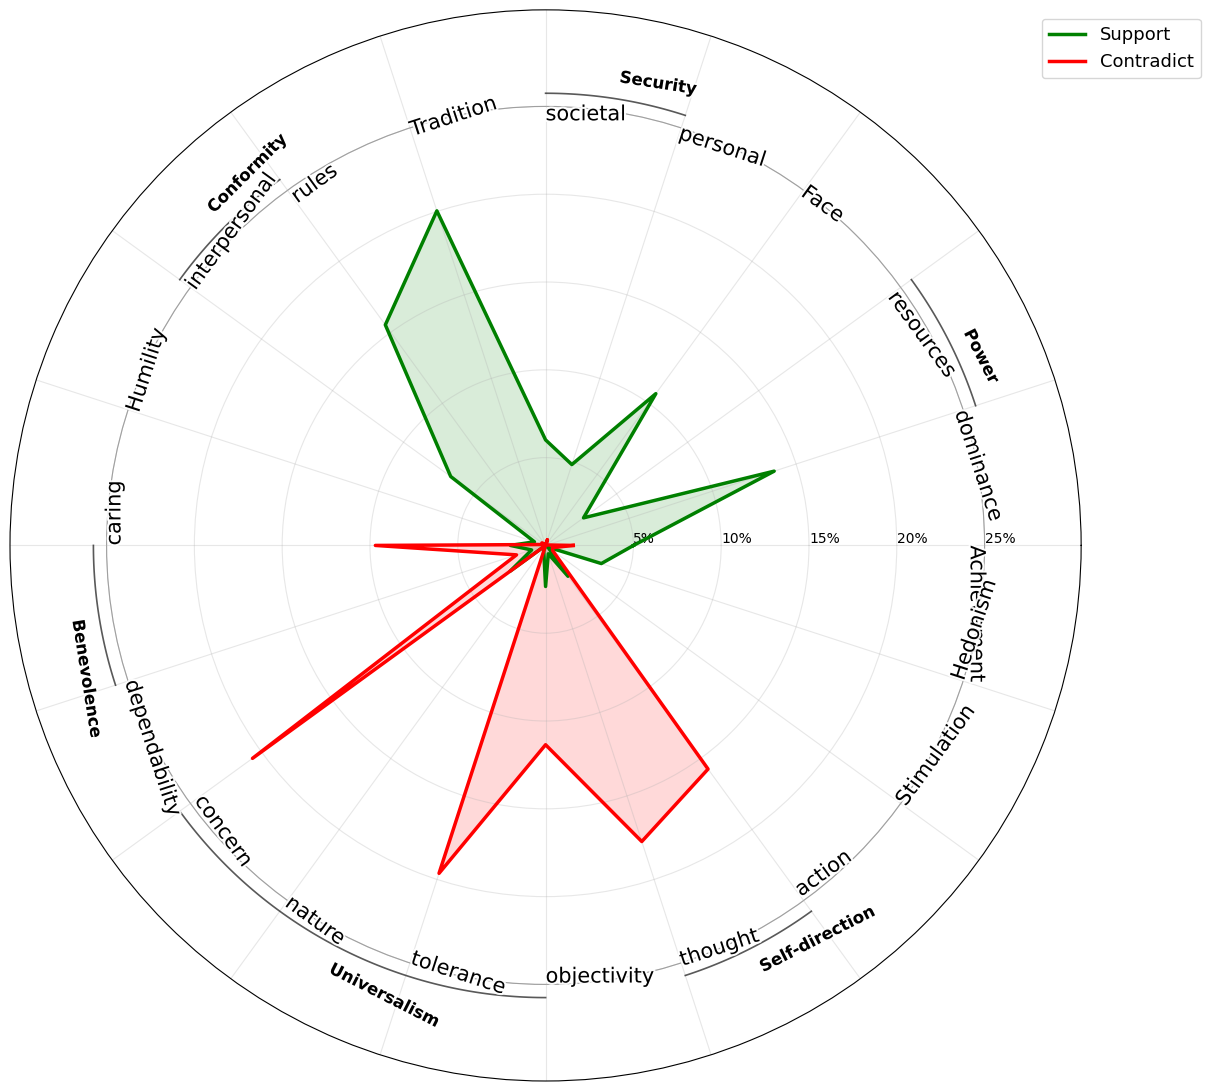

In [12]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

# --- your value_count / value_count2 should be defined above this ---

groups = [
    ("Achievement", ["Achievement"]),
    ("Power", ["dominance", "resources"]),
    ("Face", ["Face"]),
    ("Security", ["personal", "societal"]),
    ("Tradition", ["Tradition"]),
    ("Conformity", ["rules", "interpersonal"]),
    ("Humility", ["Humility"]),
    ("Benevolence", ["caring", "dependability"]),
    ("Universalism", ["concern", "nature", "tolerance", "objectivity"]),
    ("Self-direction", ["thought", "action"]),
    ("Stimulation", ["Stimulation"]),
    ("Hedonism", ["Hedonism"]),
]

# Flatten
micro = []
for parent, children in groups:
    for child in children:
        full = parent if len(children)==1 and parent in ["Achievement","Face","Tradition","Humility","Stimulation","Hedonism"] else f"{parent} ({child})"
        micro.append((parent, child, full, len(children)))

def to_percent(counter):
    total = sum(counter.values()) or 1
    arr = np.array([counter.get(full, 0) for (_,_,full,_) in micro], dtype=float)
    return (arr/total)*100.0, total

s1, n1 = to_percent(value_count_stereo)   # <-- make sure your vars are named correctly
s2, n2 = to_percent(value_count_stereo_c)

# Geometry
N = len(micro)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

def close_loop(a):
    v = a.tolist(); v += v[:1]; return v

fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, polar=True)

max_pct = max(s1.max(), s2.max())
step = 10 if max_pct > 30 else 5
ticks = list(range(step, int(np.ceil(max_pct/step)*step)+1, step))
ax.set_rlabel_position(0)
plt.yticks(ticks, [f"{t}%" for t in ticks])

outer_radius = (max(ticks) if ticks else 10)

# ===== spacing tuned for font size 15 =====
inner_label_radius = outer_radius * 0.988   # CHANGED (from 0.94)
ring_radius       = outer_radius * 1.000    # CHANGED (from 1.02)
arc_radius        = outer_radius * 1.030    # CHANGED (from 1.06)
parent_label_radius = outer_radius * 1.080  # CHANGED (from 1.15)
plt.ylim(0, outer_radius * 1.22)            # CHANGED (tighter but enough headroom)
# =========================================

# Outer ring
ring = plt.Circle((0,0), ring_radius, transform=ax.transData._b, fill=False,
                  linestyle="-", linewidth=0.8, alpha=0.4)
ax.add_artist(ring)

# Series
ax.plot(angles, close_loop(s1), linewidth=2.5, label="Support", color="green")
ax.fill(angles, close_loop(s1), alpha=0.15, color="green")
ax.plot(angles, close_loop(s2), linewidth=2.5, label="Contradict", color="red")
ax.fill(angles, close_loop(s2), alpha=0.15, color="red")

def tangent_rotation(theta):
    deg = np.degrees(theta) - 90
    if deg < -90: deg += 180
    if deg > 90:  deg -= 180
    return deg

# Remove default tick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels([""]*N)

# Inner labels (size 15) with gentle micro-stagger to prevent collisions
inner_names = [child for (parent, child, _, _) in micro]
for idx, (ang, name) in enumerate(zip(angles[:-1], inner_names)):
    rot = tangent_rotation(ang)
    ha = 'left' if (-90 <= rot <= 90) else 'right'
    r = inner_label_radius * (1.0 + ([-0.006, +0.006, -0.012, +0.012, 0.0][idx % 5]))  # CHANGED
    ax.text(ang, r, name, ha=ha, va='center',
            rotation=rot, rotation_mode='anchor', fontsize=15,  # CHANGED
            path_effects=[pe.withStroke(linewidth=3, foreground="white", alpha=0.9)])

# Group arcs & outside labels (multi-child only)
i = 0
for parent, children in groups:
    span = len(children)
    if span > 1:
        start_angle = angles[i]
        end_angle   = angles[i + span - 1]
        theta_arc   = np.linspace(start_angle, end_angle, 100)
        ax.plot(theta_arc, np.full_like(theta_arc, arc_radius),
                linewidth=1.2, alpha=0.65, color='black')
        center_angle = (start_angle + end_angle) / 2.0
        rot = tangent_rotation(center_angle)
        ha = 'left' if (-90 <= rot <= 90) else 'right'
        ax.text(center_angle, parent_label_radius, parent, ha=ha, va='center',
                rotation=rot, rotation_mode='anchor', fontsize=12, fontweight='bold',
                path_effects=[pe.withStroke(linewidth=3, foreground="white", alpha=0.8)])
    i += span

ax.grid(True, alpha=0.3)
ax.set_facecolor('white')
plt.legend(loc="upper right", bbox_to_anchor=(1.12, 1.0), fontsize=13)
plt.tight_layout()
plt.show()


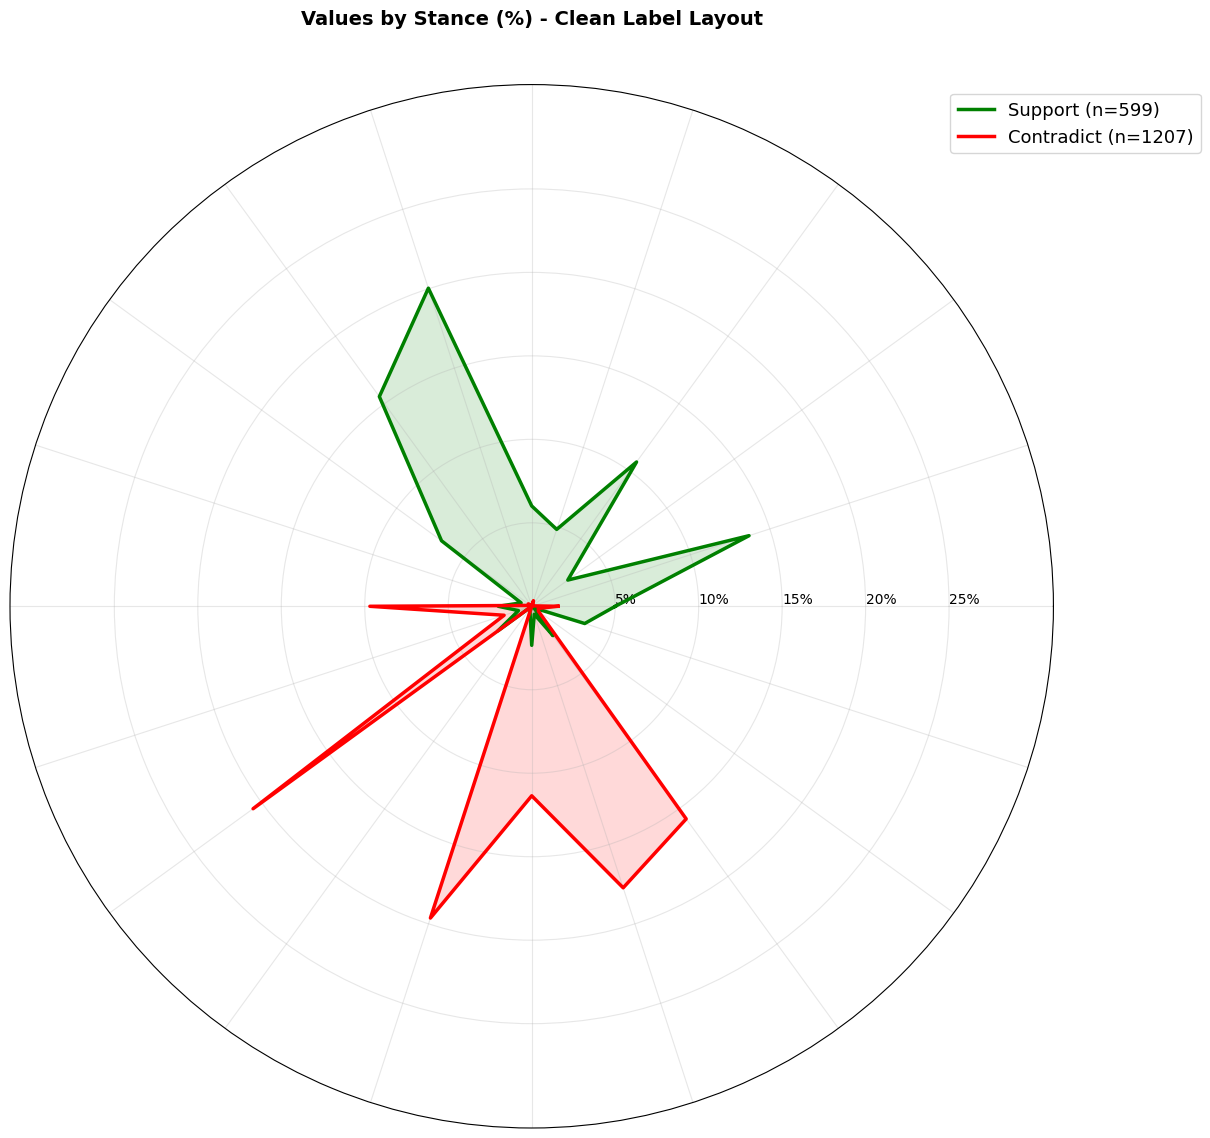

In [11]:
# Improved radar chart with clean, non-overlapping labels
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

groups = [
    ("Achievement", ["Achievement"]),
    ("Power", ["dominance", "resources"]),
    ("Face", ["Face"]),
    ("Security", ["personal", "societal"]),
    ("Tradition", ["Tradition"]),
    ("Conformity", ["rules", "interpersonal"]),
    ("Humility", ["Humility"]),
    ("Benevolence", ["caring", "dependability"]),
    ("Universalism", ["concern", "nature", "tolerance", "objectivity"]),
    ("Self-direction", ["thought", "action"]),
    ("Stimulation", ["Stimulation"]),
    ("Hedonism", ["Hedonism"]),
]

# Flatten
micro = []
for parent, children in groups:
    for child in children:
        full = parent if len(children)==1 and parent in ["Achievement","Face","Tradition","Humility","Stimulation","Hedonism"] else f"{parent} ({child})"
        micro.append((parent, child, full, len(children)))

def to_percent(counter):
    total = sum(counter.values()) or 1
    arr = np.array([counter.get(full, 0) for (_,_,full,_) in micro], dtype=float)
    return (arr/total)*100.0, total

s1, n1 = to_percent(value_count_stereo)
s2, n2 = to_percent(value_count_stereo_c)

# Geometry
N = len(micro)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

def close_loop(a):
    v = a.tolist(); v += v[:1]; return v

# Create figure with more space
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, polar=True)

max_pct = max(s1.max(), s2.max())
step = 10 if max_pct > 30 else 5
ticks = list(range(step, int(np.ceil(max_pct/step)*step)+1, step))
ax.set_rlabel_position(0)
plt.yticks(ticks, [f"{t}%" for t in ticks])

outer_radius = (max(ticks) if ticks else 10)
# Adjusted radii with tighter spacing between circles
inner_label_radius = outer_radius * 0.96
ring_radius = outer_radius * 1.01
arc_radius = outer_radius * 1.04
parent_label_radius = outer_radius * 1.08
plt.ylim(0, outer_radius * 1.25)

# No outer ring - clean graph only

# Plot series
ax.plot(angles, close_loop(s1), linewidth=2.5, label=f"Support (n={n1})", color="green")
ax.fill(angles, close_loop(s1), alpha=0.15, color="green")
ax.plot(angles, close_loop(s2), linewidth=2.5, label=f"Contradict (n={n2})", color="red")
ax.fill(angles, close_loop(s2), alpha=0.15, color="red")

def tangent_rotation(theta):
    """Calculate optimal rotation angle for tangential text"""
    deg = np.degrees(theta) - 90
    if deg < -90: deg += 180
    if deg > 90: deg -= 180
    return deg

def get_text_alignment(angle):
    """Determine text alignment based on angle"""
    deg = np.degrees(angle) % 360
    if 45 <= deg <= 135:
        return 'center', 'bottom'
    elif 225 <= deg <= 315:
        return 'center', 'top'
    elif deg > 315 or deg < 45:
        return 'left', 'center'
    else:  # 135 < deg < 225
        return 'right', 'center'

# Remove default tick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels([""]*N)

# No inner labels - clean graph only

# No group arcs or outer labels - clean graph only

# Styling improvements
plt.title("Values by Stance (%) - Clean Label Layout", y=1.05, fontsize=14, fontweight='bold')
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1.0), fontsize=13)

# Grid styling
ax.grid(True, alpha=0.3)
ax.set_facecolor('white')

# Save paths
png_path = "/mnt/data/values_radar_clean.png"
svg_path = "/mnt/data/values_radar_clean.svg"
plt.tight_layout()
plt.show()


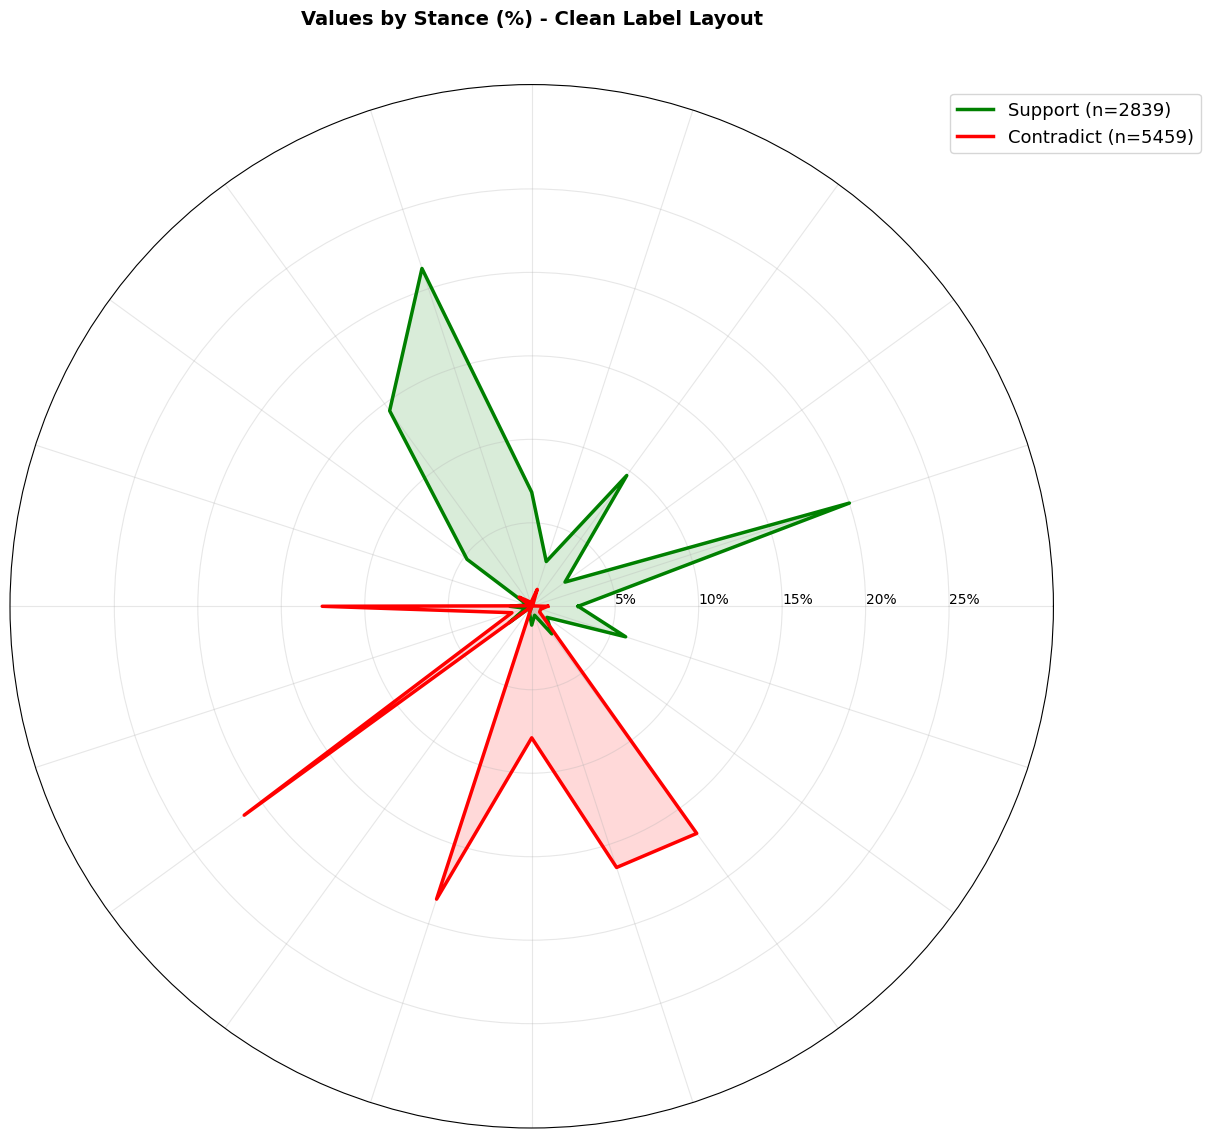

In [11]:
# Improved radar chart with clean, non-overlapping labels
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

groups = [
    ("Achievement", ["Achievement"]),
    ("Power", ["dominance", "resources"]),
    ("Face", ["Face"]),
    ("Security", ["personal", "societal"]),
    ("Tradition", ["Tradition"]),
    ("Conformity", ["rules", "interpersonal"]),
    ("Humility", ["Humility"]),
    ("Benevolence", ["caring", "dependability"]),
    ("Universalism", ["concern", "nature", "tolerance", "objectivity"]),
    ("Self-direction", ["thought", "action"]),
    ("Stimulation", ["Stimulation"]),
    ("Hedonism", ["Hedonism"]),
]

# Flatten
micro = []
for parent, children in groups:
    for child in children:
        full = parent if len(children)==1 and parent in ["Achievement","Face","Tradition","Humility","Stimulation","Hedonism"] else f"{parent} ({child})"
        micro.append((parent, child, full, len(children)))

def to_percent(counter):
    total = sum(counter.values()) or 1
    arr = np.array([counter.get(full, 0) for (_,_,full,_) in micro], dtype=float)
    return (arr/total)*100.0, total

s1, n1 = to_percent(value_count)
s2, n2 = to_percent(value_count_c)

# Geometry
N = len(micro)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

def close_loop(a):
    v = a.tolist(); v += v[:1]; return v

# Create figure with more space
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, polar=True)

max_pct = max(s1.max(), s2.max())
step = 10 if max_pct > 30 else 5
ticks = list(range(step, int(np.ceil(max_pct/step)*step)+1, step))
ax.set_rlabel_position(0)
plt.yticks(ticks, [f"{t}%" for t in ticks])

outer_radius = (max(ticks) if ticks else 10)
# Adjusted radii with tighter spacing between circles
inner_label_radius = outer_radius * 0.96
ring_radius = outer_radius * 1.01
arc_radius = outer_radius * 1.04
parent_label_radius = outer_radius * 1.08
plt.ylim(0, outer_radius * 1.25)

# No outer ring - clean graph only

# Plot series
ax.plot(angles, close_loop(s1), linewidth=2.5, label=f"Support (n={n1})", color="green")
ax.fill(angles, close_loop(s1), alpha=0.15, color="green")
ax.plot(angles, close_loop(s2), linewidth=2.5, label=f"Contradict (n={n2})", color="red")
ax.fill(angles, close_loop(s2), alpha=0.15, color="red")

def tangent_rotation(theta):
    """Calculate optimal rotation angle for tangential text"""
    deg = np.degrees(theta) - 90
    if deg < -90: deg += 180
    if deg > 90: deg -= 180
    return deg

def get_text_alignment(angle):
    """Determine text alignment based on angle"""
    deg = np.degrees(angle) % 360
    if 45 <= deg <= 135:
        return 'center', 'bottom'
    elif 225 <= deg <= 315:
        return 'center', 'top'
    elif deg > 315 or deg < 45:
        return 'left', 'center'
    else:  # 135 < deg < 225
        return 'right', 'center'

# Remove default tick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels([""]*N)

# No inner labels - clean graph only

# No group arcs or outer labels - clean graph only

# Styling improvements
plt.title("Values by Stance (%) - Clean Label Layout", y=1.05, fontsize=14, fontweight='bold')
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1.0), fontsize=13)

# Grid styling
ax.grid(True, alpha=0.3)
ax.set_facecolor('white')

# Save paths
png_path = "/mnt/data/values_radar_clean.png"
svg_path = "/mnt/data/values_radar_clean.svg"
plt.tight_layout()
plt.show()


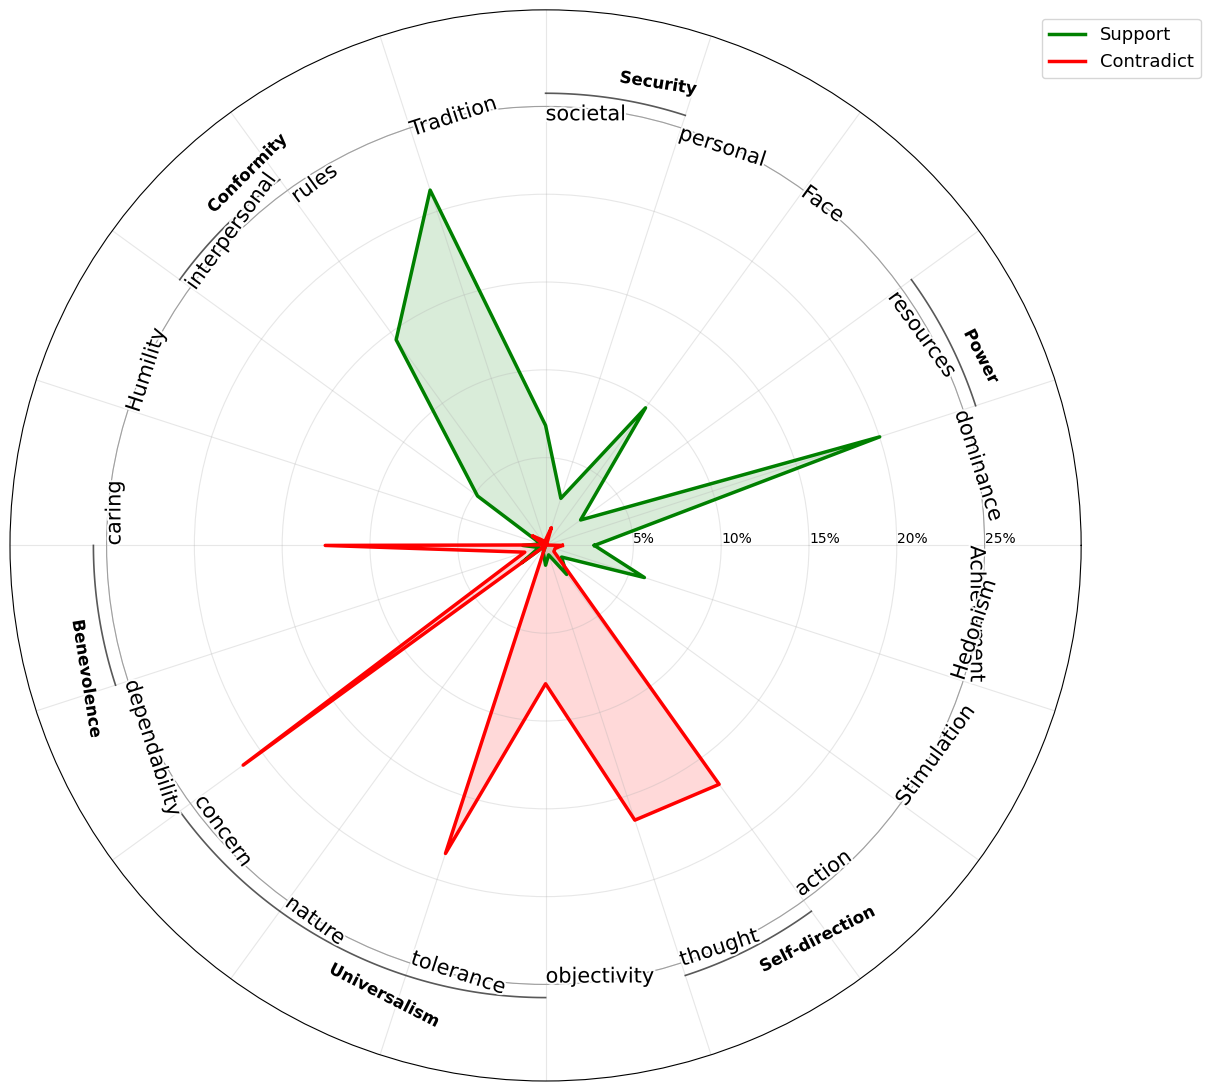

In [13]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

# --- your value_count / value_count2 should be defined above this ---

groups = [
    ("Achievement", ["Achievement"]),
    ("Power", ["dominance", "resources"]),
    ("Face", ["Face"]),
    ("Security", ["personal", "societal"]),
    ("Tradition", ["Tradition"]),
    ("Conformity", ["rules", "interpersonal"]),
    ("Humility", ["Humility"]),
    ("Benevolence", ["caring", "dependability"]),
    ("Universalism", ["concern", "nature", "tolerance", "objectivity"]),
    ("Self-direction", ["thought", "action"]),
    ("Stimulation", ["Stimulation"]),
    ("Hedonism", ["Hedonism"]),
]

# Flatten
micro = []
for parent, children in groups:
    for child in children:
        full = parent if len(children)==1 and parent in ["Achievement","Face","Tradition","Humility","Stimulation","Hedonism"] else f"{parent} ({child})"
        micro.append((parent, child, full, len(children)))

def to_percent(counter):
    total = sum(counter.values()) or 1
    arr = np.array([counter.get(full, 0) for (_,_,full,_) in micro], dtype=float)
    return (arr/total)*100.0, total

s1, n1 = to_percent(value_count)   # <-- make sure your vars are named correctly
s2, n2 = to_percent(value_count_c)

# Geometry
N = len(micro)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

def close_loop(a):
    v = a.tolist(); v += v[:1]; return v

fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, polar=True)

max_pct = max(s1.max(), s2.max())
step = 10 if max_pct > 30 else 5
ticks = list(range(step, int(np.ceil(max_pct/step)*step)+1, step))
ax.set_rlabel_position(0)
plt.yticks(ticks, [f"{t}%" for t in ticks])

outer_radius = (max(ticks) if ticks else 10)

# ===== spacing tuned for font size 15 =====
inner_label_radius = outer_radius * 0.988   # CHANGED (from 0.94)
ring_radius       = outer_radius * 1.000    # CHANGED (from 1.02)
arc_radius        = outer_radius * 1.030    # CHANGED (from 1.06)
parent_label_radius = outer_radius * 1.080  # CHANGED (from 1.15)
plt.ylim(0, outer_radius * 1.22)            # CHANGED (tighter but enough headroom)
# =========================================

# Outer ring
ring = plt.Circle((0,0), ring_radius, transform=ax.transData._b, fill=False,
                  linestyle="-", linewidth=0.8, alpha=0.4)
ax.add_artist(ring)

# Series
ax.plot(angles, close_loop(s1), linewidth=2.5, label="Support", color="green")
ax.fill(angles, close_loop(s1), alpha=0.15, color="green")
ax.plot(angles, close_loop(s2), linewidth=2.5, label="Contradict", color="red")
ax.fill(angles, close_loop(s2), alpha=0.15, color="red")

def tangent_rotation(theta):
    deg = np.degrees(theta) - 90
    if deg < -90: deg += 180
    if deg > 90:  deg -= 180
    return deg

# Remove default tick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels([""]*N)

# Inner labels (size 15) with gentle micro-stagger to prevent collisions
inner_names = [child for (parent, child, _, _) in micro]
for idx, (ang, name) in enumerate(zip(angles[:-1], inner_names)):
    rot = tangent_rotation(ang)
    ha = 'left' if (-90 <= rot <= 90) else 'right'
    r = inner_label_radius * (1.0 + ([-0.006, +0.006, -0.012, +0.012, 0.0][idx % 5]))  # CHANGED
    ax.text(ang, r, name, ha=ha, va='center',
            rotation=rot, rotation_mode='anchor', fontsize=15,  # CHANGED
            path_effects=[pe.withStroke(linewidth=3, foreground="white", alpha=0.9)])

# Group arcs & outside labels (multi-child only)
i = 0
for parent, children in groups:
    span = len(children)
    if span > 1:
        start_angle = angles[i]
        end_angle   = angles[i + span - 1]
        theta_arc   = np.linspace(start_angle, end_angle, 100)
        ax.plot(theta_arc, np.full_like(theta_arc, arc_radius),
                linewidth=1.2, alpha=0.65, color='black')
        center_angle = (start_angle + end_angle) / 2.0
        rot = tangent_rotation(center_angle)
        ha = 'left' if (-90 <= rot <= 90) else 'right'
        ax.text(center_angle, parent_label_radius, parent, ha=ha, va='center',
                rotation=rot, rotation_mode='anchor', fontsize=12, fontweight='bold',
                path_effects=[pe.withStroke(linewidth=3, foreground="white", alpha=0.8)])
    i += span

ax.grid(True, alpha=0.3)
ax.set_facecolor('white')
plt.legend(loc="upper right", bbox_to_anchor=(1.12, 1.0), fontsize=13)
plt.tight_layout()
plt.show()


Top values at each level

In [39]:
import os
import json
from collections import Counter

def extract_value_key(level):
    return {
        1: ("level_1_values", "level_1_value"),
        2: ("level_2_values", "level_2_value"),
        3: ("level_3_values", "level_3_value")
    }[level]


def get_top_values_across_all_problems(level=2, top_n=20, base_dir="final_frames"):
    """
    Returns the top-N most frequent values across all problems (deduplicated by frame ID).
    """
    value_container, value_key = extract_value_key(level)
    value_counter = Counter()
    seen_frame_ids = set()

    for problem_folder in os.listdir(base_dir):
        path = os.path.join(base_dir, problem_folder, "values.jsonl")
        if not os.path.isfile(path):
            continue

        with open(path, "r") as f:
            for line in f:
                try:
                    data = json.loads(line)
                    frame_id = data.get("id")
                    if not frame_id or frame_id in seen_frame_ids:
                        continue
                    seen_frame_ids.add(frame_id)

                    values = data.get("response", {}).get("values", {}).get(value_container, [])
                    for item in values:
                        val = item.get(value_key)
                        if val:
                            value_counter[val] += 1
                except json.JSONDecodeError:
                    continue

    top_values = value_counter.most_common(top_n)

    print(f"\nTop {top_n} unique-frame values at Level {level}:")
    for val, count in top_values:
        print(f"- {val}: {count}")
    
    return top_values

In [36]:
get_top_values_across_all_problems(level=3, top_n=10, base_dir="final_frames")


Top 10 unique-frame values at Level 3:
- Have equality: 1043
- Be just: 985
- Be broadminded: 905
- Have freedom of thought: 782
- Be independent: 715
- Have freedom of action: 630
- Be loving: 527
- Have the wisdom to accept others: 501
- Be choosing own goals: 354
- Have an objective view: 320


[('Have equality', 1043),
 ('Be just', 985),
 ('Be broadminded', 905),
 ('Have freedom of thought', 782),
 ('Be independent', 715),
 ('Have freedom of action', 630),
 ('Be loving', 527),
 ('Have the wisdom to accept others', 501),
 ('Be choosing own goals', 354),
 ('Have an objective view', 320)]

In [ ]:
#Support stance
get_top_values_across_all_problems(level=3, top_n=10, base_dir="final_frames")


Top 10 unique-frame values at Level 3:
- Be respecting traditions: 530
- Have the right to command: 427
- Be behaving properly: 179
- Be compliant: 173
- Have a stable society: 170
- Have pleasure: 150
- Have a good reputation: 136
- Have influence: 126
- Have social recognition: 111
- Be polite: 99


[('Be respecting traditions', 530),
 ('Have the right to command', 427),
 ('Be behaving properly', 179),
 ('Be compliant', 173),
 ('Have a stable society', 170),
 ('Have pleasure', 150),
 ('Have a good reputation', 136),
 ('Have influence', 126),
 ('Have social recognition', 111),
 ('Be polite', 99)]

In [ ]:
#disregard stance
get_top_values_across_all_problems(level=1, top_n=4, base_dir="final_frames")


Top 4 unique-frame values at Level 1:
- Self-Transcendence: 1067
- Openness to Change: 881
- Conservation: 84
- Self-Enhancement: 44


[('Self-Transcendence', 1067),
 ('Openness to Change', 881),
 ('Conservation', 84),
 ('Self-Enhancement', 44)]

In [40]:
#support stance
get_top_values_across_all_problems(level=1, top_n=4, base_dir="final_frames")


Top 4 unique-frame values at Level 1:
- Conservation: 742
- Self-Enhancement: 675
- Openness to Change: 162
- Self-Transcendence: 93


[('Conservation', 742),
 ('Self-Enhancement', 675),
 ('Openness to Change', 162),
 ('Self-Transcendence', 93)]

Missing Level 1 values

Frame-value distribution (no. of values per frame)

Counter({2: 405, 3: 313, 1: 182, 4: 141, 5: 38, 6: 10, 7: 3, 0: 2})


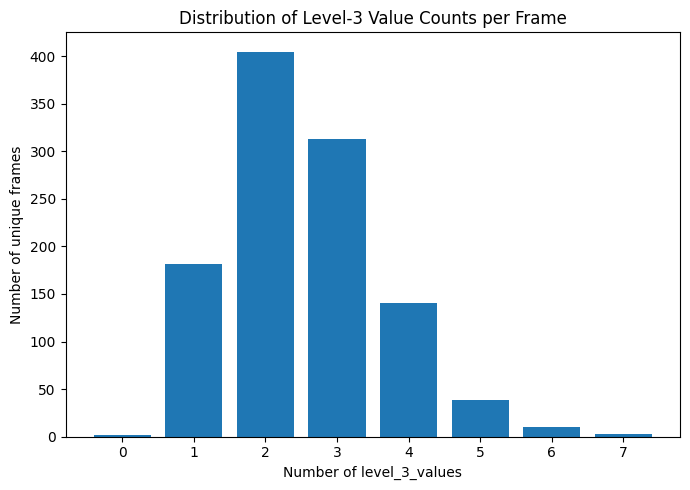

In [ ]:
import os
import json
from collections import Counter
import matplotlib.pyplot as plt

base_dir = "final_frames"   # <-- path to your top-level folder

frame_counts = {}   # {frame_id: number_of_level3_values}

for root, dirs, files in os.walk(base_dir):
    if "values.jsonl" in files:
        path = os.path.join(root, "values.jsonl")
        with open(path, "r", encoding="utf-8") as f:
            for line in f:
                if not line.strip():
                    continue
                data = json.loads(line)
                fid = data["id"]
                # count level_3_values (some frames may repeat across problems)
                n_level3 = len(data["response"]["values"].get("level_3_values", []))
                # keep only one record per unique frame id
                frame_counts[fid] = n_level3

# Distribution: how many frames have 1, 2, 3 … level_3_values
distribution = Counter(frame_counts.values())
print(distribution)   # e.g. Counter({1: 120, 2: 45, 3: 8})

# Bar plot
plt.figure(figsize=(7,5))
# Sort by number of level_3_values
xs = sorted(distribution)
ys = [distribution[x] for x in xs]

plt.bar(xs, ys)
plt.xlabel("Number of values")
plt.ylabel("Number of unique frames")
plt.title("Distribution of Value Counts (Level 3) per Frame")
plt.xticks(xs)  # show integer ticks only
plt.tight_layout()
plt.show()


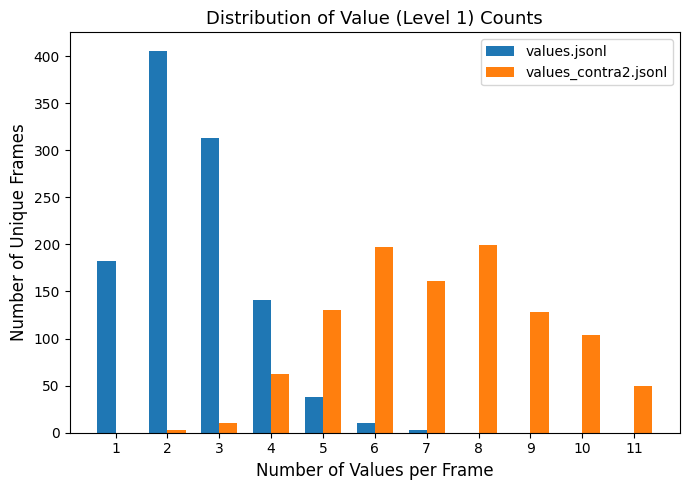

In [4]:
import os, json
from collections import Counter
import matplotlib.pyplot as plt

base_dir = "final_frames"

def level3_distribution(filename):
    counts = {}
    for root, dirs, files in os.walk(base_dir):
        if filename in files:
            path = os.path.join(root, filename)
            with open(path, "r", encoding="utf-8") as f:
                for line in f:
                    if not line.strip():
                        continue
                    d = json.loads(line)
                    fid = d["id"]
                    n = len(d["response"]["values"].get("level_3_values", []))
                    counts[fid] = n
    return Counter(counts.values())

dist_main   = level3_distribution("values.jsonl")
dist_contra = level3_distribution("values_contra2.jsonl")

# Exclude these counts
exclude = {0, 12, 13, 14, 15, 16, 17, 20}

# Ensure the same x-axis across both, then filter
all_counts = sorted((set(dist_main) | set(dist_contra)) - exclude)
main_vals   = [dist_main.get(c, 0) for c in all_counts]
contra_vals = [dist_contra.get(c, 0) for c in all_counts]

# --- Plot ---
plt.figure(figsize=(7,5))
bar_w = 0.35
x = range(len(all_counts))

plt.bar([i - bar_w/2 for i in x], main_vals,  width=bar_w,
        label="values.jsonl",   color="#1f77b4")
plt.bar([i + bar_w/2 for i in x], contra_vals, width=bar_w,
        label="values_contra2.jsonl", color="#ff7f0e")

plt.xlabel("Number of Values per Frame", fontsize=12)
plt.ylabel("Number of Unique Frames", fontsize=12)
plt.title("Distribution of Value (Level 1) Counts", fontsize=13)
plt.xticks(x, all_counts)
plt.legend()
plt.tight_layout()

# Save high-res for paper
plt.savefig("level3_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


Values bar plot

In [3]:
import os
import json
from collections import Counter, defaultdict
import pandas as pd

# -----------------------
# 1. Define canonical mapping (level_2 -> level_3)
# -----------------------
def get_valid_level3_actions(level2_action: str) -> list[str]:
    if level2_action == "Self-direction (thought)":
        return ["Be creative", "Be curious", "Have freedom of thought"]
    elif level2_action == "Self-direction (action)":
        return ["Be choosing your own goals", "Be independent", "Have freedom of action", "Have privacy"]
    elif level2_action == "Stimulation":
        return ["Have an exciting life", "Have a varied life", "Be daring"]
    elif level2_action == "Hedonism":
        return ["Have pleasure"]
    elif level2_action == "Achievement":
        return ["Be ambitious", "Have success", "Be capable", "Be intellectual", "Be courageous"]
    elif level2_action == "Power (dominance)":
        return ["Have influence", "Have the right to command"]
    elif level2_action == "Power (resources)":
        return ["Have wealth"]
    elif level2_action == "Face":
        return ["Have a social recognition", "Have a good reputation"]
    elif level2_action == "Security (personal)":
        return ["Have a sense of belonging", "Have good health", "Have no debts", "Be neat and tidy", "Have a comfortable life"]
    elif level2_action == "Security (societal)":
        return ["Have a safe country", "Have a stable society"]
    elif level2_action == "Tradition":
        return ["Be respecting traditions", "Be holding religious faith"]
    elif level2_action == "Conformity (rules)":
        return ["Be compliant", "Be self-disciplined", "Be behaving properly"]
    elif level2_action == "Conformity (interpersonal)":
        return ["Be polite", "Be honouring elders"]
    elif level2_action == "Humility":
        return ["Be humble", "Have life accepted as is"]
    elif level2_action == "Benevolence (caring)":
        return ["Be helpful", "Be honest", "Be forgiving", "Have the own family secured", "Be loving"]
    elif level2_action == "Benevolence (dependability)":
        return ["Be responsible", "Have loyalty towards friends"]
    elif level2_action == "Universalism (concern)":
        return ["Have equality", "Be just", "Have a world at peace"]
    elif level2_action == "Universalism (nature)":
        return ["Be protecting the environment", "Have harmony with nature", "Have a world of beauty"]
    elif level2_action == "Universalism (tolerance)":
        return ["Be broadminded", "Have the wisdom to accept others"]
    elif level2_action == "Universalism (objectivity)":
        return ["Be logical", "Have an objective view"]
    else:
        return []

# Build inverse mapping: level_3 -> level_2
level3_to_level2 = {}
for lvl2, lvl3s in {
    "Self-direction (thought)": get_valid_level3_actions("Self-direction (thought)"),
    "Self-direction (action)": get_valid_level3_actions("Self-direction (action)"),
    "Stimulation": get_valid_level3_actions("Stimulation"),
    "Hedonism": get_valid_level3_actions("Hedonism"),
    "Achievement": get_valid_level3_actions("Achievement"),
    "Power (dominance)": get_valid_level3_actions("Power (dominance)"),
    "Power (resources)": get_valid_level3_actions("Power (resources)"),
    "Face": get_valid_level3_actions("Face"),
    "Security (personal)": get_valid_level3_actions("Security (personal)"),
    "Security (societal)": get_valid_level3_actions("Security (societal)"),
    "Tradition": get_valid_level3_actions("Tradition"),
    "Conformity (rules)": get_valid_level3_actions("Conformity (rules)"),
    "Conformity (interpersonal)": get_valid_level3_actions("Conformity (interpersonal)"),
    "Humility": get_valid_level3_actions("Humility"),
    "Benevolence (caring)": get_valid_level3_actions("Benevolence (caring)"),
    "Benevolence (dependability)": get_valid_level3_actions("Benevolence (dependability)"),
    "Universalism (concern)": get_valid_level3_actions("Universalism (concern)"),
    "Universalism (nature)": get_valid_level3_actions("Universalism (nature)"),
    "Universalism (tolerance)": get_valid_level3_actions("Universalism (tolerance)"),
    "Universalism (objectivity)": get_valid_level3_actions("Universalism (objectivity)")
}.items():
    for lvl3 in lvl3s:
        level3_to_level2[lvl3] = lvl2

# Canonical 54 values (in order)
all_54_values = list(level3_to_level2.keys())

# -----------------------
# 2. Define problem hierarchy (same as your code)
# -----------------------
problem_map = {
    # Objectification
    "objectification": "Objectification",
    "sexual_entitlement": "Objectification",
    "sexual_innuendo": "Objectification",
    "sexualization": "Objectification",
    "unrealistic_beauty_standards": "Objectification",
    "age_related_sexualization": "Objectification",
    # Stereotyping
    "stereotyping": "Stereotyping",
    "false_equivalence": "Stereotyping",
    "deflection": "Stereotyping",
    "misunderstanding_feminism": "Stereotyping",
    "mistrust_in_women": "Stereotyping",
    "biased_judgement": "Stereotyping",
    "false_accusations": "Stereotyping",
    "scapegoating": "Stereotyping",
    "divisiveness": "Stereotyping",
    "misrepresentation": "Stereotyping",
    "reductionism": "Stereotyping",
    "commitment_phobia": "Stereotyping",
    # Violence
    "violence": "Violence",
    "sexual_harassment": "Violence",
    "promoting_rape_culture": "Violence",
    "trivializing_consent": "Violence",
    "victim_blaming": "Violence",
    "endorsing_marital_rape": "Violence",
    "promoting_self_harm": "Violence",
    "professional_misconduct": "Violence",
    # Trivializing serious issues
    "trivializing_serious_issues": "Trivializing serious issues",
    "trivializing_women_s_issues": "Trivializing serious issues",
    "trivializing_sexual_assault": "Trivializing serious issues",
    "minimizing_feminist_efforts": "Trivializing serious issues",
    "trivializing_women_s_sexual_satisfaction": "Trivializing serious issues",
    "trivializing_mental_health_issues": "Trivializing serious issues",
    "trivializing_oppression": "Trivializing serious issues",
    "trivializing_infidelity": "Trivializing serious issues",
    "trivializing_prostitution": "Trivializing serious issues",
    "trivializing_eating_disorders": "Trivializing serious issues",
    "trivializing_addiction": "Trivializing serious issues",
    "trivializing_the_need_for_representation": "Trivializing serious issues",
    # Patriarchal attitudes
    "patriarchal_attitudes": "Patriarchal attitudes",
    "patriarchal_control": "Patriarchal attitudes",
    "possessiveness": "Patriarchal attitudes",
    "ownership": "Patriarchal attitudes",
    "gatekeeping": "Patriarchal attitudes",
    "coercion": "Patriarchal attitudes",
    "forced_marriage": "Patriarchal attitudes",
    "policing_women_s_bodies": "Patriarchal attitudes",
    "gender_essentialism": "Patriarchal attitudes",
    "double_standards": "Patriarchal attitudes",
    "enforced_gender_norms": "Patriarchal attitudes",
    "conditional_respect": "Patriarchal attitudes",
    "undermining_women_s_capabilities": "Patriarchal attitudes",
    "demeaning_aspirations": "Patriarchal attitudes",
    "intellectual_degradation": "Patriarchal attitudes",
    "incest": "Patriarchal attitudes",
    "wage_disparity": "Patriarchal attitudes",
    "promoting_infidelity": "Patriarchal attitudes",
    "dismissing_women_s_rights": "Patriarchal attitudes",
    "undermining_women_s_rights_movements": "Patriarchal attitudes",
    "male_validation": "Patriarchal attitudes",
    "toxic_masculinity": "Patriarchal attitudes",
    "women_subjugation": "Patriarchal attitudes",
    # Discrimination
    "discrimination": "Discrimination",
    "ableism": "Discrimination",
    "ageism": "Discrimination",
    "appearance_based_discrimination": "Discrimination",
    "exclusion": "Discrimination",
    "reverse_sexism": "Discrimination",
    "workplace_discrimination": "Discrimination",
    "racism": "Discrimination",
    "intersectional_prejudice": "Discrimination",
    "transphobia": "Discrimination",
    "classism": "Discrimination",
    "neo_sexism": "Discrimination",
    "homophobia": "Discrimination"
}

# -----------------------
# 3. Traverse folders and count
# -----------------------
base_dir = "final_frames"
problem_counters = defaultdict(Counter)

for subfolder in os.listdir(base_dir):
    subpath = os.path.join(base_dir, subfolder)
    if not os.path.isdir(subpath):
        continue

    main_problem = problem_map.get(subfolder)
    if not main_problem:
        continue

    for fname in ["values.jsonl", "values_contra2.jsonl"]:
        fpath = os.path.join(subpath, fname)
        if not os.path.exists(fpath):
            continue
        with open(fpath, "r", encoding="utf-8") as f:
            for line in f:
                try:
                    entry = json.loads(line)
                    values = entry.get("response", {}).get("values", {})
                    for v in values.get("level_3_values", []):
                        val_name = v.get("level_3_value")
                        if val_name in all_54_values:  # only count canonical values
                            problem_counters[main_problem][val_name] += 1
                except json.JSONDecodeError:
                    continue

# -----------------------
# 4. Build DataFrame
# -----------------------
df = pd.DataFrame(index=all_54_values)

for problem, counter in problem_counters.items():
    df[problem] = [counter.get(val, 0) for val in df.index]

df = df.fillna(0).astype(int)

# Add "Value Category"
df.insert(0, "Value Category", [level3_to_level2[val] for val in df.index])

# Move index into "Values"
df.reset_index(inplace=True)
df.rename(columns={"index": "Values"}, inplace=True)

# Add Total column
df["Total"] = df.iloc[:, 2:].sum(axis=1)

# Save
df.to_csv("value_counts_by_problem.csv", index=False)
print(df.head(10))


                       Values            Value Category  Discrimination  \
0                 Be creative  Self-direction (thought)               8   
1                  Be curious  Self-direction (thought)              22   
2     Have freedom of thought  Self-direction (thought)              90   
3  Be choosing your own goals   Self-direction (action)               0   
4              Be independent   Self-direction (action)              76   
5      Have freedom of action   Self-direction (action)              70   
6                Have privacy   Self-direction (action)               9   
7       Have an exciting life               Stimulation               3   
8          Have a varied life               Stimulation               3   
9                   Be daring               Stimulation               7   

   Objectification  Stereotyping  Patriarchal attitudes  Violence  \
0               11            18                     18         1   
1               24            73    

In [2]:
# -----------------------
# 3b. Count unique frames per main problem
# -----------------------
frame_counts_by_problem = defaultdict(set)  # use set to keep unique frames

for subfolder in os.listdir(base_dir):
    subpath = os.path.join(base_dir, subfolder)
    if not os.path.isdir(subpath):
        continue

    main_problem = problem_map.get(subfolder)
    if not main_problem:
        continue

    for fname in ["values.jsonl", "values_contra2.jsonl"]:
        fpath = os.path.join(subpath, fname)
        if not os.path.exists(fpath):
            continue
        with open(fpath, "r", encoding="utf-8") as f:
            for line in f:
                try:
                    entry = json.loads(line)
                    frame_id = entry.get("id")
                    if frame_id:
                        frame_counts_by_problem[main_problem].add(frame_id)
                except json.JSONDecodeError:
                    continue

# Convert sets to counts
frame_counts_by_problem = {k: len(v) for k, v in frame_counts_by_problem.items()}

# Print counts
print("Unique frame counts per main problem:")
for problem, count in frame_counts_by_problem.items():
    print(f"{problem}: {count}")


Unique frame counts per main problem:
Discrimination: 132
Objectification: 210
Stereotyping: 256
Patriarchal attitudes: 197
Violence: 77
Trivializing serious issues: 70


In [9]:
# -----------------------------
# Utilities: JSONL read/write
# -----------------------------
def read_jsonl(path):
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            yield json.loads(line)

def write_jsonl(path, items):
    with open(path, "w", encoding="utf-8") as f:
        for it in items:
            f.write(json.dumps(it, ensure_ascii=False) + "\n")

In [15]:
import os
from collections import defaultdict
frame_set= set()
pb_dict=defaultdict(int)
for i in os.listdir('final_frames'):
    frame_path = os.path.join('final_frames',i,'frames.jsonl')
    for j in read_jsonl(frame_path):
        if j['id'] not in frame_set:
            if i in PROBLEM_TO_MAIN:
                pb_dict[PROBLEM_TO_MAIN[i]] += 1
                frame_set.add(j['id'])
            else:
                print(i)

endorsing_necrophilia
endorsing_necrophilia
endorsing_necrophilia
endorsing_necrophilia
endorsing_necrophilia


In [14]:
pb_dict

defaultdict(int,
            {'Discrimination of women': 129,
             'Objectification': 205,
             'Stereotyping': 228,
             'Patriarchal attitudes': 188,
             'Pseudoscience': 9,
             'Disrespect towards women': 64,
             'Dehumanization of women': 53,
             'Shaming': 68,
             'Violence': 70,
             'Exploitation of Women by Men': 12,
             'Trivializing serious issues': 63})

In [17]:
print(sum(pb_dict.values()))

1089


Number of level 3 values in total:

In [ ]:
#support values
import os
import json

base_dir = "final_frames"  # path to your folder
total_count = 0
problem_counts = {}

for problem_folder in os.listdir(base_dir):
    problem_path = os.path.join(base_dir, problem_folder)
    values_file = os.path.join(problem_path, "values.jsonl")

    # skip if not a directory or file missing
    if not os.path.isdir(problem_path) or not os.path.exists(values_file):
        continue

    count = 0
    with open(values_file, "r", encoding="utf-8") as f:
        for line in f:
            try:
                rec = json.loads(line.strip())
                lvl3 = rec.get("response", {}).get("values", {}).get("level_3_values", [])
                count += len(lvl3)
            except json.JSONDecodeError:
                print(f"⚠️ Skipping malformed line in {values_file}")
                continue

    problem_counts[problem_folder] = count
    total_count += count

# summary
print("🔹 Total Level 3 values across all problems:", total_count)



🔹 Total Level 3 values across all problems: 3051


In [20]:
#disregard values
import os
import json

base_dir = "final_frames"  # path to your folder
total_count = 0
problem_counts = {}

for problem_folder in os.listdir(base_dir):
    problem_path = os.path.join(base_dir, problem_folder)
    values_file = os.path.join(problem_path, "values_contra2.jsonl")

    # skip if not a directory or file missing
    if not os.path.isdir(problem_path) or not os.path.exists(values_file):
        continue

    count = 0
    with open(values_file, "r", encoding="utf-8") as f:
        for line in f:
            try:
                rec = json.loads(line.strip())
                lvl3 = rec.get("response", {}).get("values", {}).get("level_3_values", [])
                count += len(lvl3)
            except json.JSONDecodeError:
                print(f"⚠️ Skipping malformed line in {values_file}")
                continue

    problem_counts[problem_folder] = count
    total_count += count

# summary
print("🔹 Total Level 3 values across all problems:", total_count)



🔹 Total Level 3 values across all problems: 9133


In [8]:

from collections import Counter
import json
import os
value_count_stereo=Counter()
value_count_stereo_c=Counter()
def read_jsonl(path):
    with open(path, "r") as f:
        for line in f:
            line = line.strip()
            if line:
                ex = json.loads(line)
                yield ex

def write_jsonl(path, data):
    with open(path, "w") as f:
        for ex in data:
            f.write(json.dumps(ex) + "\n")

stereo=["objectification", "sexual_entitlement", "sexual_innuendo", "sexualization", "unrealistic_beauty_standards", "age_related_sexualization"]
data_path='final_frames'


for folder in stereo:
    path=f"{data_path}/{folder}/values.jsonl"
    if not os.path.exists(path):
        print('p')
        continue
    for line in read_jsonl(path):
        values=line.get("response", {}).get("values", {}).get("level_2_values", [])
        for v in values:
            val=v.get("level_2_value")
            if val:
                value_count_stereo[val]+=1
    path2=f"{data_path}/{folder}/values_contra2.jsonl"
    if not os.path.exists(path2):
        continue
    for line in read_jsonl(path2):
        values=line.get("response", {}).get("values", {}).get("level_2_values", [])
        for v in values:
            val=v.get("level_2_value")
            if val:
                value_count_stereo_c[val]+=1

value_count=Counter()
value_count_c=Counter()

for folder in os.listdir(data_path):
    path=f"{data_path}/{folder}/values.jsonl"
    if not os.path.exists(path):
        continue
    for line in read_jsonl(path):
        values=line.get("response", {}).get("values", {}).get("level_2_values", [])
        for v in values:
            val=v.get("level_2_value")
            if val:
                value_count[val]+=1
    path2=f"{data_path}/{folder}/values_contra2.jsonl"
    if not os.path.exists(path2):
        continue
    for line in read_jsonl(path2):
        values=line.get("response", {}).get("values", {}).get("level_2_values", [])
        for v in values:
            val=v.get("level_2_value")
            if val:
                value_count_c[val]+=1
                
                



In [9]:
labels = ["Achievement","Power (resources)", "Power (dominance)","Face","Security (personal)","Security (societal)",
          "Tradition","Conformity (rules)","Conformity (interpersonal)","Humility",
          "Benevolence (caring)","Benevolence (dependability)","Universalism (concern)",
          "Universalism (nature)","Universalism (tolerance)","Universalism (objectivity)",
          "Self-direction (thought)","Self-direction (action)","Stimulation","Hedonism"]
for label in labels:
    if label not in value_count:
        value_count[label]=0
    if label not in value_count_c:
        value_count_c[label]=0
    if label not in value_count_stereo:
        value_count_stereo[label]=0
    if label not in value_count_stereo_c:
        value_count_stereo_c[label]=0
def filter_and_reorder_counter(counter, labels):
    """Filter counter to only include labels and reorder according to labels list"""
    # Create new counter with only labels present, in the order of labels
    filtered_counter = Counter()
    for label in labels:
        if label in counter:
            filtered_counter[label] = counter[label]
        # If you want to include missing labels with 0 count, uncomment the next two lines:
        # else:
        #     filtered_counter[label] = 0
    return filtered_counter
value_count = filter_and_reorder_counter(value_count, labels)
value_count_c = filter_and_reorder_counter(value_count_c, labels)
value_count_stereo = filter_and_reorder_counter(value_count_stereo, labels)
value_count_stereo_c = filter_and_reorder_counter(value_count_stereo_c, labels)
print(len(value_count))
print(len(value_count_c))
print(len(value_count_stereo))
print(len(value_count_stereo_c))

20
20
20
20


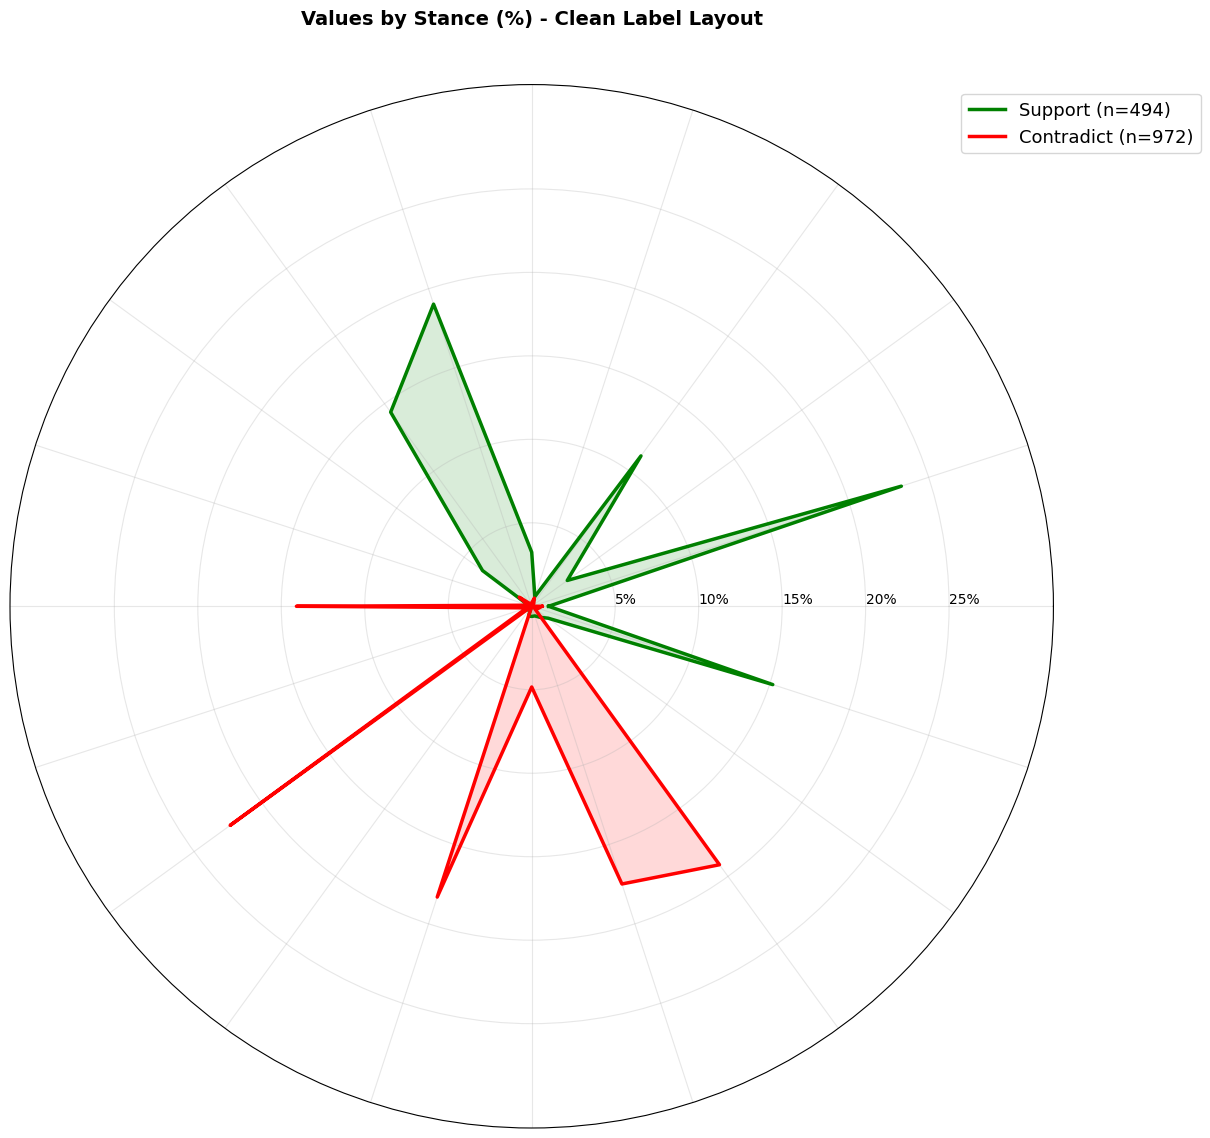

In [12]:
# Improved radar chart with clean, non-overlapping labels
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

groups = [
    ("Achievement", ["Achievement"]),
    ("Power", ["dominance", "resources"]),
    ("Face", ["Face"]),
    ("Security", ["personal", "societal"]),
    ("Tradition", ["Tradition"]),
    ("Conformity", ["rules", "interpersonal"]),
    ("Humility", ["Humility"]),
    ("Benevolence", ["caring", "dependability"]),
    ("Universalism", ["concern", "nature", "tolerance", "objectivity"]),
    ("Self-direction", ["thought", "action"]),
    ("Stimulation", ["Stimulation"]),
    ("Hedonism", ["Hedonism"]),
]

# Flatten
micro = []
for parent, children in groups:
    for child in children:
        full = parent if len(children)==1 and parent in ["Achievement","Face","Tradition","Humility","Stimulation","Hedonism"] else f"{parent} ({child})"
        micro.append((parent, child, full, len(children)))

def to_percent(counter):
    total = sum(counter.values()) or 1
    arr = np.array([counter.get(full, 0) for (_,_,full,_) in micro], dtype=float)
    return (arr/total)*100.0, total

s1, n1 = to_percent(value_count_stereo)
s2, n2 = to_percent(value_count_stereo_c)

# Geometry
N = len(micro)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

def close_loop(a):
    v = a.tolist(); v += v[:1]; return v

# Create figure with more space
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, polar=True)

max_pct = max(s1.max(), s2.max())
step = 10 if max_pct > 30 else 5
ticks = list(range(step, int(np.ceil(max_pct/step)*step)+1, step))
ax.set_rlabel_position(0)
plt.yticks(ticks, [f"{t}%" for t in ticks])

outer_radius = (max(ticks) if ticks else 10)
# Adjusted radii with tighter spacing between circles
inner_label_radius = outer_radius * 0.96
ring_radius = outer_radius * 1.01
arc_radius = outer_radius * 1.04
parent_label_radius = outer_radius * 1.08
plt.ylim(0, outer_radius * 1.25)

# No outer ring - clean graph only

# Plot series
ax.plot(angles, close_loop(s1), linewidth=2.5, label=f"Support (n={n1})", color="green")
ax.fill(angles, close_loop(s1), alpha=0.15, color="green")
ax.plot(angles, close_loop(s2), linewidth=2.5, label=f"Contradict (n={n2})", color="red")
ax.fill(angles, close_loop(s2), alpha=0.15, color="red")

def tangent_rotation(theta):
    """Calculate optimal rotation angle for tangential text"""
    deg = np.degrees(theta) - 90
    if deg < -90: deg += 180
    if deg > 90: deg -= 180
    return deg

def get_text_alignment(angle):
    """Determine text alignment based on angle"""
    deg = np.degrees(angle) % 360
    if 45 <= deg <= 135:
        return 'center', 'bottom'
    elif 225 <= deg <= 315:
        return 'center', 'top'
    elif deg > 315 or deg < 45:
        return 'left', 'center'
    else:  # 135 < deg < 225
        return 'right', 'center'

# Remove default tick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels([""]*N)

# No inner labels - clean graph only

# No group arcs or outer labels - clean graph only

# Styling improvements
plt.title("Values by Stance (%) - Clean Label Layout", y=1.05, fontsize=14, fontweight='bold')
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1.0), fontsize=13)

# Grid styling
ax.grid(True, alpha=0.3)
ax.set_facecolor('white')

# Save paths
png_path = "values_radar_onj.png"
svg_path = "/mnt/data/values_radar_clean.svg"
plt.savefig(png_path)
plt.tight_layout()
plt.show()


/tmp/ipykernel_41936/1245308666.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


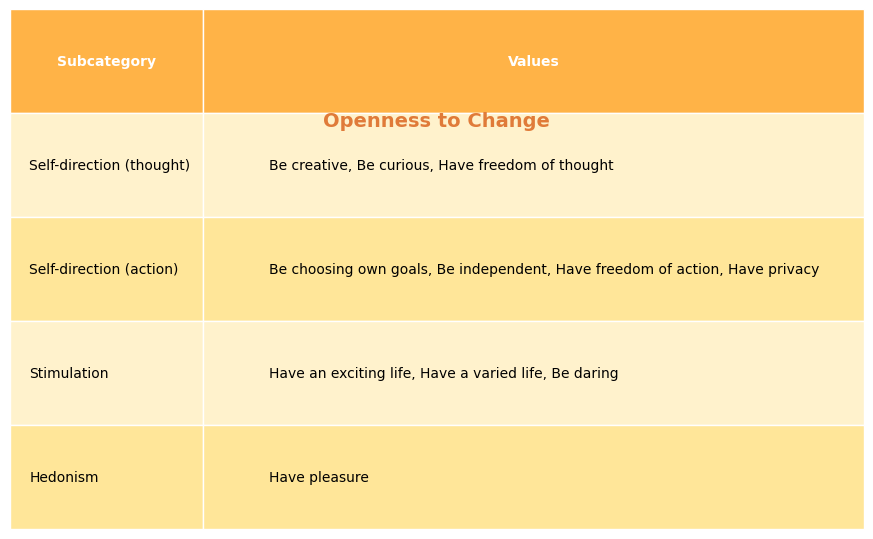

In [3]:
import matplotlib.pyplot as plt

# Define taxonomy
data = [
    ["Self-direction (thought)",
     "Be creative, Be curious, Have freedom of thought"],
    ["Self-direction (action)",
     "Be choosing own goals, Be independent, Have freedom of action, Have privacy"],
    ["Stimulation",
     "Have an exciting life, Have a varied life, Be daring"],
    ["Hedonism",
     "Have pleasure"]
]

# Create figure
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis("off")

# Add table
table = ax.table(
    cellText=data,
    colLabels=["Subcategory", "Values"],
    loc="center",
    cellLoc="left",
    colLoc="center"
)

# Style headers
header_color = "#FFB347"     # warm orange
row_colors = ["#FFF2CC", "#FFE699"] * 2  # alternating rows

for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor("white")
    cell.set_fontsize(10)
    cell.set_height(0.3)
    # Header row
    if row == 0 and col in [0, 1]:
        cell.set_text_props(weight='bold', color="white")
        cell.set_facecolor(header_color)
    # Body rows
    elif row > 0:
        cell.set_facecolor(row_colors[(row - 1) % len(row_colors)])

# Set column widths for nicer proportions
table.auto_set_column_width([0, 1])
table.scale(1, 1.5)

plt.title("Openness to Change", fontsize=14, fontweight="bold", color="#E07B39", pad=20)
plt.tight_layout()

plt.savefig("openness_table.pdf", bbox_inches="tight")
plt.show()
